## 1. Introduction

### Osteoporosis
Osteoporosis is the most common bone disease that develops when bone mineral density and bone mass decreases, or when the structure and strength of bone changes. It can increase the risk of fractures, i.e., broken bones. 

In the United States in 2010, an estimated 10.2 million people aged 50 and over had osteoporosis and about 43.3 million more people had low bone mass. However, it's a silent disease because people typically do not have symptom. Therefore, it would be benefitical to people's health if we can make an accurate prediction for it.

### NHANES
The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. Datasets of this program are prepared and published through the Centers for Disease Control and Prevention (CDC) and avaiable to the public.

In this project, we are going to analyze data from **NHANES** for the years **2013-2014, and 2017-March 2020 Pre-Pandemic**. 2015-2016 was skipped because Osteoporosis assessment in NHANES for that period was not completed. The NHANES program suspended field operations in March 2020 due to the coronavirus disease 2019 (COVID-19) pandemic. As a result, data collection for the NHANES 2019-2020 cycle was not completed and the collected data are not nationally representative. Therefore, data collected from 2019 to March 2020 were combined with data from the NHANES 2017-2018 cycle to form a nationally representative sample of NHANES 2017-March 2020 pre-pandemic data.

## 2. Objective

Design an accurate way to predict whether someone has osteoporosis based on age, gender, race, BMI, smoking, alcohol consumption, sleep hours, arthritis and liver condition.

## 3. Data Source

2013-2014 data can be downloaded from [link1](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013), 2017-2020 data can be downloaded from [link2](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020). Files can be linked with other NHANES files by the respondent sequence number (SEQN). 

**1. Questionnaire Data: Osteoporosis**

The target sample for Osteoporosis Questionnaire in 2013-2014 and 2017-2020 are participants aged **40+** and **50+**, respectively.

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `OSQ060`: Ever told had osteoporosis/brittle bones, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**2. Demographic Variables and Sample Weights**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `RIDAGEYR`: Age in years at screening
- `RIAGENDR`: Gender, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Male              |
| 2             | Female            |
| .             | Missing           |

- `RIDRETH3 `: Race/Hispanic origin w/ Non-Hispanic Asian
| Code or Value | Value Description                   |
|---------------|-------------------------------------|
| 1             | Mexican American                    |
| 2             | Other Hispanic                      |
| 3             | Non-Hispanic White                  |
| 4             | Non-Hispanic Black                  |
| 6             | Non-Hispanic Asian                  |
| 7             | Other Race - Including Multi-Racial |
| .             | Missing                             |

**3. Examination Data: Body Measures**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `BMXBMI`: Body Mass Index (kg/m**2)

**4. Questionnaire Data: Smoking - Cigarette Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SMQ020`:Smoked at least 100 cigarettes in life, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |

**5. Questionnaire Data: Alcohol Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `ALQ151`: Ever have 4/5 or more drinks every day, see the table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**6. Questionnaire Data: Sleep Disorders**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SLD010H (SLD012)`: How much sleep do you get (hours), see the table for details:
| Code or Value | Value Description              |
|---------------|--------------------------------|
| 2 to 11       | Range of Values                |
| 12            | 12 hours or more              |
| 77            | Refused                        |
| 99            | Don't know                     |


**7. Questionnaire Data: Medical Conditions**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `MCQ160A`: Doctor ever said you had arthritis
- `MCA160L`: Ever told you had any liver condition

They all share the following table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |



## 4. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTETomek

from data_clean_utils import (
    import_data,
    clean_variable,
    clean_demographic, 
    clean_bmi,
    number_to_category,
    clean_sleep,
    get_percentage,
    countplot_by_category,
    barplot_percentage,
    multi_countplot,
    plot_both_gender,
    gender_groupby,
    get_prevalence_ratios,
)
from machine_learning_utils import (
    make_mi_scores,
    train_test_standardscaler,
    plot_cf_matrix,
    get_predict_proba,
    plot_auc,
    binary_classification_scores,
    get_nn_models,
    evaludate_nn_models,
)

# display settings of Pandas
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows = 1000 
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 50

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# set seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "figure.dpi":100, 'savefig.dpi':100}
sns.set_theme(style="ticks", rc=custom_params)
%config InlineBackend.figure_format = "retina"

2023-02-27 22:02:26.300287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 5. Importing the Data

### 5.1 Osteoporosis

In [2]:
data_oste = import_data('osteoporosis.XPT')
data_oste = data_oste[['SEQN', 'OSQ060']]
data_oste.head()

SEQN  OSQ060
0  73557.0     2.0
1  73558.0     2.0
2  73559.0     1.0
3  73561.0     2.0
4  73562.0     2.0

In [3]:
data_oste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8802 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8802 non-null   float64
 1   OSQ060  8801 non-null   float64
dtypes: float64(2)
memory usage: 206.3 KB


In [4]:
data_oste.OSQ060.value_counts()

2.0    7833
1.0     933
9.0      34
7.0       1
Name: OSQ060, dtype: int64

Osteoporosis as the target (dependent) variable, we only need the data whose `OSQ060` is 2 (No) or 1 (Yes). 

### 5.2 Demographics

In [5]:
data_demo = import_data('demographics.XPT')
data_demo = data_demo[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3']]
data_demo.head()

SEQN  RIDAGEYR  RIAGENDR  RIDRETH3
0  73557.0      69.0       1.0       4.0
1  73558.0      54.0       1.0       3.0
2  73559.0      72.0       1.0       3.0
3  73560.0       9.0       1.0       3.0
4  73561.0      73.0       2.0       3.0

In [6]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25735 entries, 0 to 15559
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      25735 non-null  float64
 1   RIDAGEYR  25735 non-null  float64
 2   RIAGENDR  25735 non-null  float64
 3   RIDRETH3  25735 non-null  float64
dtypes: float64(4)
memory usage: 1005.3 KB


In [7]:
data_demo.describe()

SEQN      RIDAGEYR      RIAGENDR      RIDRETH3
count   25735.000000  2.573500e+04  25735.000000  25735.000000
mean   101860.656693  3.284958e+01      1.505576      3.408510
std     19185.829389  2.499293e+01      0.499979      1.621798
min     73557.000000  5.397605e-79      1.000000      1.000000
25%     79990.500000  1.000000e+01      1.000000      3.000000
50%    111955.000000  2.900000e+01      2.000000      3.000000
75%    118388.500000  5.500000e+01      2.000000      4.000000
max    124822.000000  8.000000e+01      2.000000      7.000000

What we can learn:

- There is no missing values in the demographics dataframe.
- `SEQN` should be string as it's the identifier of respondent.
- `RIAGENDR`, and `RIDRETH3` are actually categorical data, we might need to convert them for easier interpretation in EDA.

### 5.3 BMI

In [8]:
data_bmi = import_data('body-measures.XPT')
data_bmi = data_bmi[['SEQN', 'BMXBMI']]
data_bmi.head()

SEQN  BMXBMI
0  73557.0    26.7
1  73558.0    28.6
2  73559.0    28.9
3  73560.0    17.1
4  73561.0    19.7

In [9]:
data_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24113 entries, 0 to 14299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    24113 non-null  float64
 1   BMXBMI  22192 non-null  float64
dtypes: float64(2)
memory usage: 565.1 KB


In [10]:
data_bmi.describe()

SEQN        BMXBMI
count   24113.000000  22192.000000
mean   101431.636545     26.257548
std     19283.894500      8.247252
min     73557.000000     11.900000
25%     79810.000000     20.100000
50%    111702.000000     25.400000
75%    118322.000000     30.900000
max    124822.000000     92.300000

What we can learn:

- `BMXBMI` has about 8% missing values. Considering the inaccuracy of data imputation and the size of not missing records, let's delete those missing records directly.

### 5.4 Smoking

In [11]:
data_smoking = import_data('smoking.XPT')
data_smoking = data_smoking[['SEQN', 'SMQ020']]
data_smoking.head()

SEQN  SMQ020
0  73557.0     1.0
1  73558.0     1.0
2  73559.0     1.0
3  73561.0     2.0
4  73562.0     1.0

In [12]:
data_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18305 entries, 0 to 11136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18305 non-null  float64
 1   SMQ020  15806 non-null  float64
dtypes: float64(2)
memory usage: 429.0 KB


In [13]:
data_smoking.SMQ020.value_counts()

2.0    9331
1.0    6468
9.0       5
7.0       2
Name: SMQ020, dtype: int64

We only need data in which `SMQ020` is 1 (Yes) or 2 (No).

### 5.5 Alcohol

In [14]:
data_alcohol = import_data('alcohol.XPT')
data_alcohol = data_alcohol[['SEQN', 'ALQ151']]
data_alcohol.head()

SEQN  ALQ151
0  73557.0     1.0
1  73558.0     1.0
2  73559.0     2.0
3  73561.0     2.0
4  73562.0     2.0

In [15]:
data_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14889 entries, 0 to 8964
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14889 non-null  float64
 1   ALQ151  11978 non-null  float64
dtypes: float64(2)
memory usage: 349.0 KB


In [16]:
data_alcohol.ALQ151.value_counts()

2.0    10106
1.0     1861
9.0       10
7.0        1
Name: ALQ151, dtype: int64

Similarly, we only need data in which ALQ151 is 1 (Yes) or 2 (No).

### 5.6 Sleep Hours

We need to get 2013-2014, 2017-2020 dataset separately, because the variable names are different.

In [17]:
data_sleep_13, data_sleep_17 = import_data('sleep.XPT', split=True)
data_sleep_13 = data_sleep_13[['SEQN', 'SLD010H']]
data_sleep_17 = data_sleep_17[['SEQN', 'SLD012']].rename(columns={'SLD012': 'SLD010H'})
data_sleep = pd.concat([data_sleep_17, data_sleep_13])
data_sleep.head()

SEQN  SLD010H
0  109266.0      7.5
1  109267.0      8.0
2  109268.0      8.5
3  109271.0     10.0
4  109273.0      6.5

In [18]:
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16659 entries, 0 to 6463
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     16659 non-null  float64
 1   SLD010H  16566 non-null  float64
dtypes: float64(2)
memory usage: 390.4 KB


In [19]:
data_sleep.describe()

SEQN       SLD010H
count   16659.000000  16566.000000
mean   102178.545051      7.410570
std     19122.931951      2.486186
min     73557.000000      2.000000
25%     80138.500000      6.000000
50%    112125.000000      7.500000
75%    118493.500000      8.000000
max    124822.000000     99.000000

The max value of `SLD010H` 99 doesn't mean 99 hours, it indicates "Don't know".  We should select the data with
valid sleep hours only.

### 5.7 Medical Conditions

The dataset contains medical conditions: arthritis, liver condition.

In [20]:
data_medical = import_data('medical.XPT')
data_medical = data_medical[['SEQN', 'MCQ160A', 'MCQ160L']]
data_medical.head()

SEQN  MCQ160A  MCQ160L
0  73557.0      1.0      2.0
1  73558.0      2.0      2.0
2  73559.0      2.0      2.0
3  73560.0      NaN      NaN
4  73561.0      1.0      2.0

In [21]:
data_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24756 entries, 0 to 14985
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     24756 non-null  float64
 1   MCQ160A  15001 non-null  float64
 2   MCQ160L  15001 non-null  float64
dtypes: float64(3)
memory usage: 773.6 KB


In [22]:
data_medical[['MCQ160A', 'MCQ160L']].value_counts()

MCQ160A  MCQ160L
2.0      2.0        10260
1.0      2.0         3983
2.0      1.0          361
1.0      1.0          330
9.0      2.0           33
2.0      9.0           21
1.0      9.0            7
9.0      1.0            5
         9.0            1
dtype: int64

We only need the records with 1 (Yes) or 2 (No) value.

## 6. Cleaning and Merging the Data

We will need to clean each dataset and then merge them together for future analysis. Corresponding functions can be found in the seperate file. `SEQN` is the key to connect all datasets, it has been renamed to `ID` and converted to string type.

To interpret the demographics data, we need to rename the columns to make it more readable, and replace
numeric code values in Gender and Race with real life values. 

For BMI data, we just need to rename the BMI column and make sure its data type is float.

For smoking, alcohol data, we need to convert code values to "Yes" or "No", and rename the columns to increase the readability.

For sleep hours, we should keep records with valid sleep hours only, remove code values for "Refused" or "Don't know" or missing values.

Osteoporosis is the target we want to predict accurately. Therefore, we will keep the data that answered Yes or No to the question "Ever told had osteoporosis/brittle bones" and ignore those with unsure answers.

In [23]:
df_demo = clean_demographic(data_demo)
df_bmi = clean_bmi(data_bmi)
df_smoking = clean_variable(data_smoking, col_list=["SMQ020"])
df_alcohol = clean_variable(data_alcohol, col_list=["ALQ151"])
df_sleep = clean_sleep(data_sleep)
df_medical = clean_variable(data_medical, col_list=["MCQ160A", "MCQ160L"])
df_oste = clean_variable(data_oste, col_list=["OSQ060"])

Then we need to merge all datasets.

In [24]:
# use inner join to get complete data only
df_merged = (
    df_demo.merge(df_bmi, how='inner', on='ID')
    .merge(df_smoking, how='inner', on='ID')
    .merge(df_alcohol, how='inner', on='ID')
    .merge(df_sleep, how='inner', on='ID')
    .merge(df_medical, how='inner', on='ID')
    .merge(df_oste, how='inner', on='ID')
)
# remove duplicates
df_merged = df_merged.drop_duplicates()
# ID is no longer needed
df_merged = df_merged.drop(columns=['ID'])
df_merged.head()

Age  Gender                Race   BMI Smoking Heavy Drinking  Sleep Hours  \
0  69.0    Male  Non-Hispanic Black  26.7     Yes            Yes          7.0   
1  54.0    Male  Non-Hispanic White  28.6     Yes            Yes          9.0   
2  72.0    Male  Non-Hispanic White  28.9     Yes             No          8.0   
3  73.0  Female  Non-Hispanic White  19.7      No             No          9.0   
4  56.0    Male    Mexican American  41.7     Yes             No          5.0   

  Arthritis Liver Condition Osteoporosis  
0       Yes              No           No  
1        No              No           No  
2        No              No          Yes  
3       Yes              No           No  
4       Yes              No           No

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 0 to 6508
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              6509 non-null   float64 
 1   Gender           6509 non-null   category
 2   Race             6509 non-null   category
 3   BMI              6509 non-null   float64 
 4   Smoking          6509 non-null   category
 5   Heavy Drinking   6509 non-null   category
 6   Sleep Hours      6509 non-null   float64 
 7   Arthritis        6509 non-null   category
 8   Liver Condition  6509 non-null   category
 9   Osteoporosis     6509 non-null   category
dtypes: category(7), float64(3)
memory usage: 248.8 KB


The final dataset has 6509 rows, 10 columns and without missing values.

## 7. EDA

### 7.1 Basic Distribution of the Dataset 

We can visualize the dataset by each categorical variable to have a bettering understanding of the data.

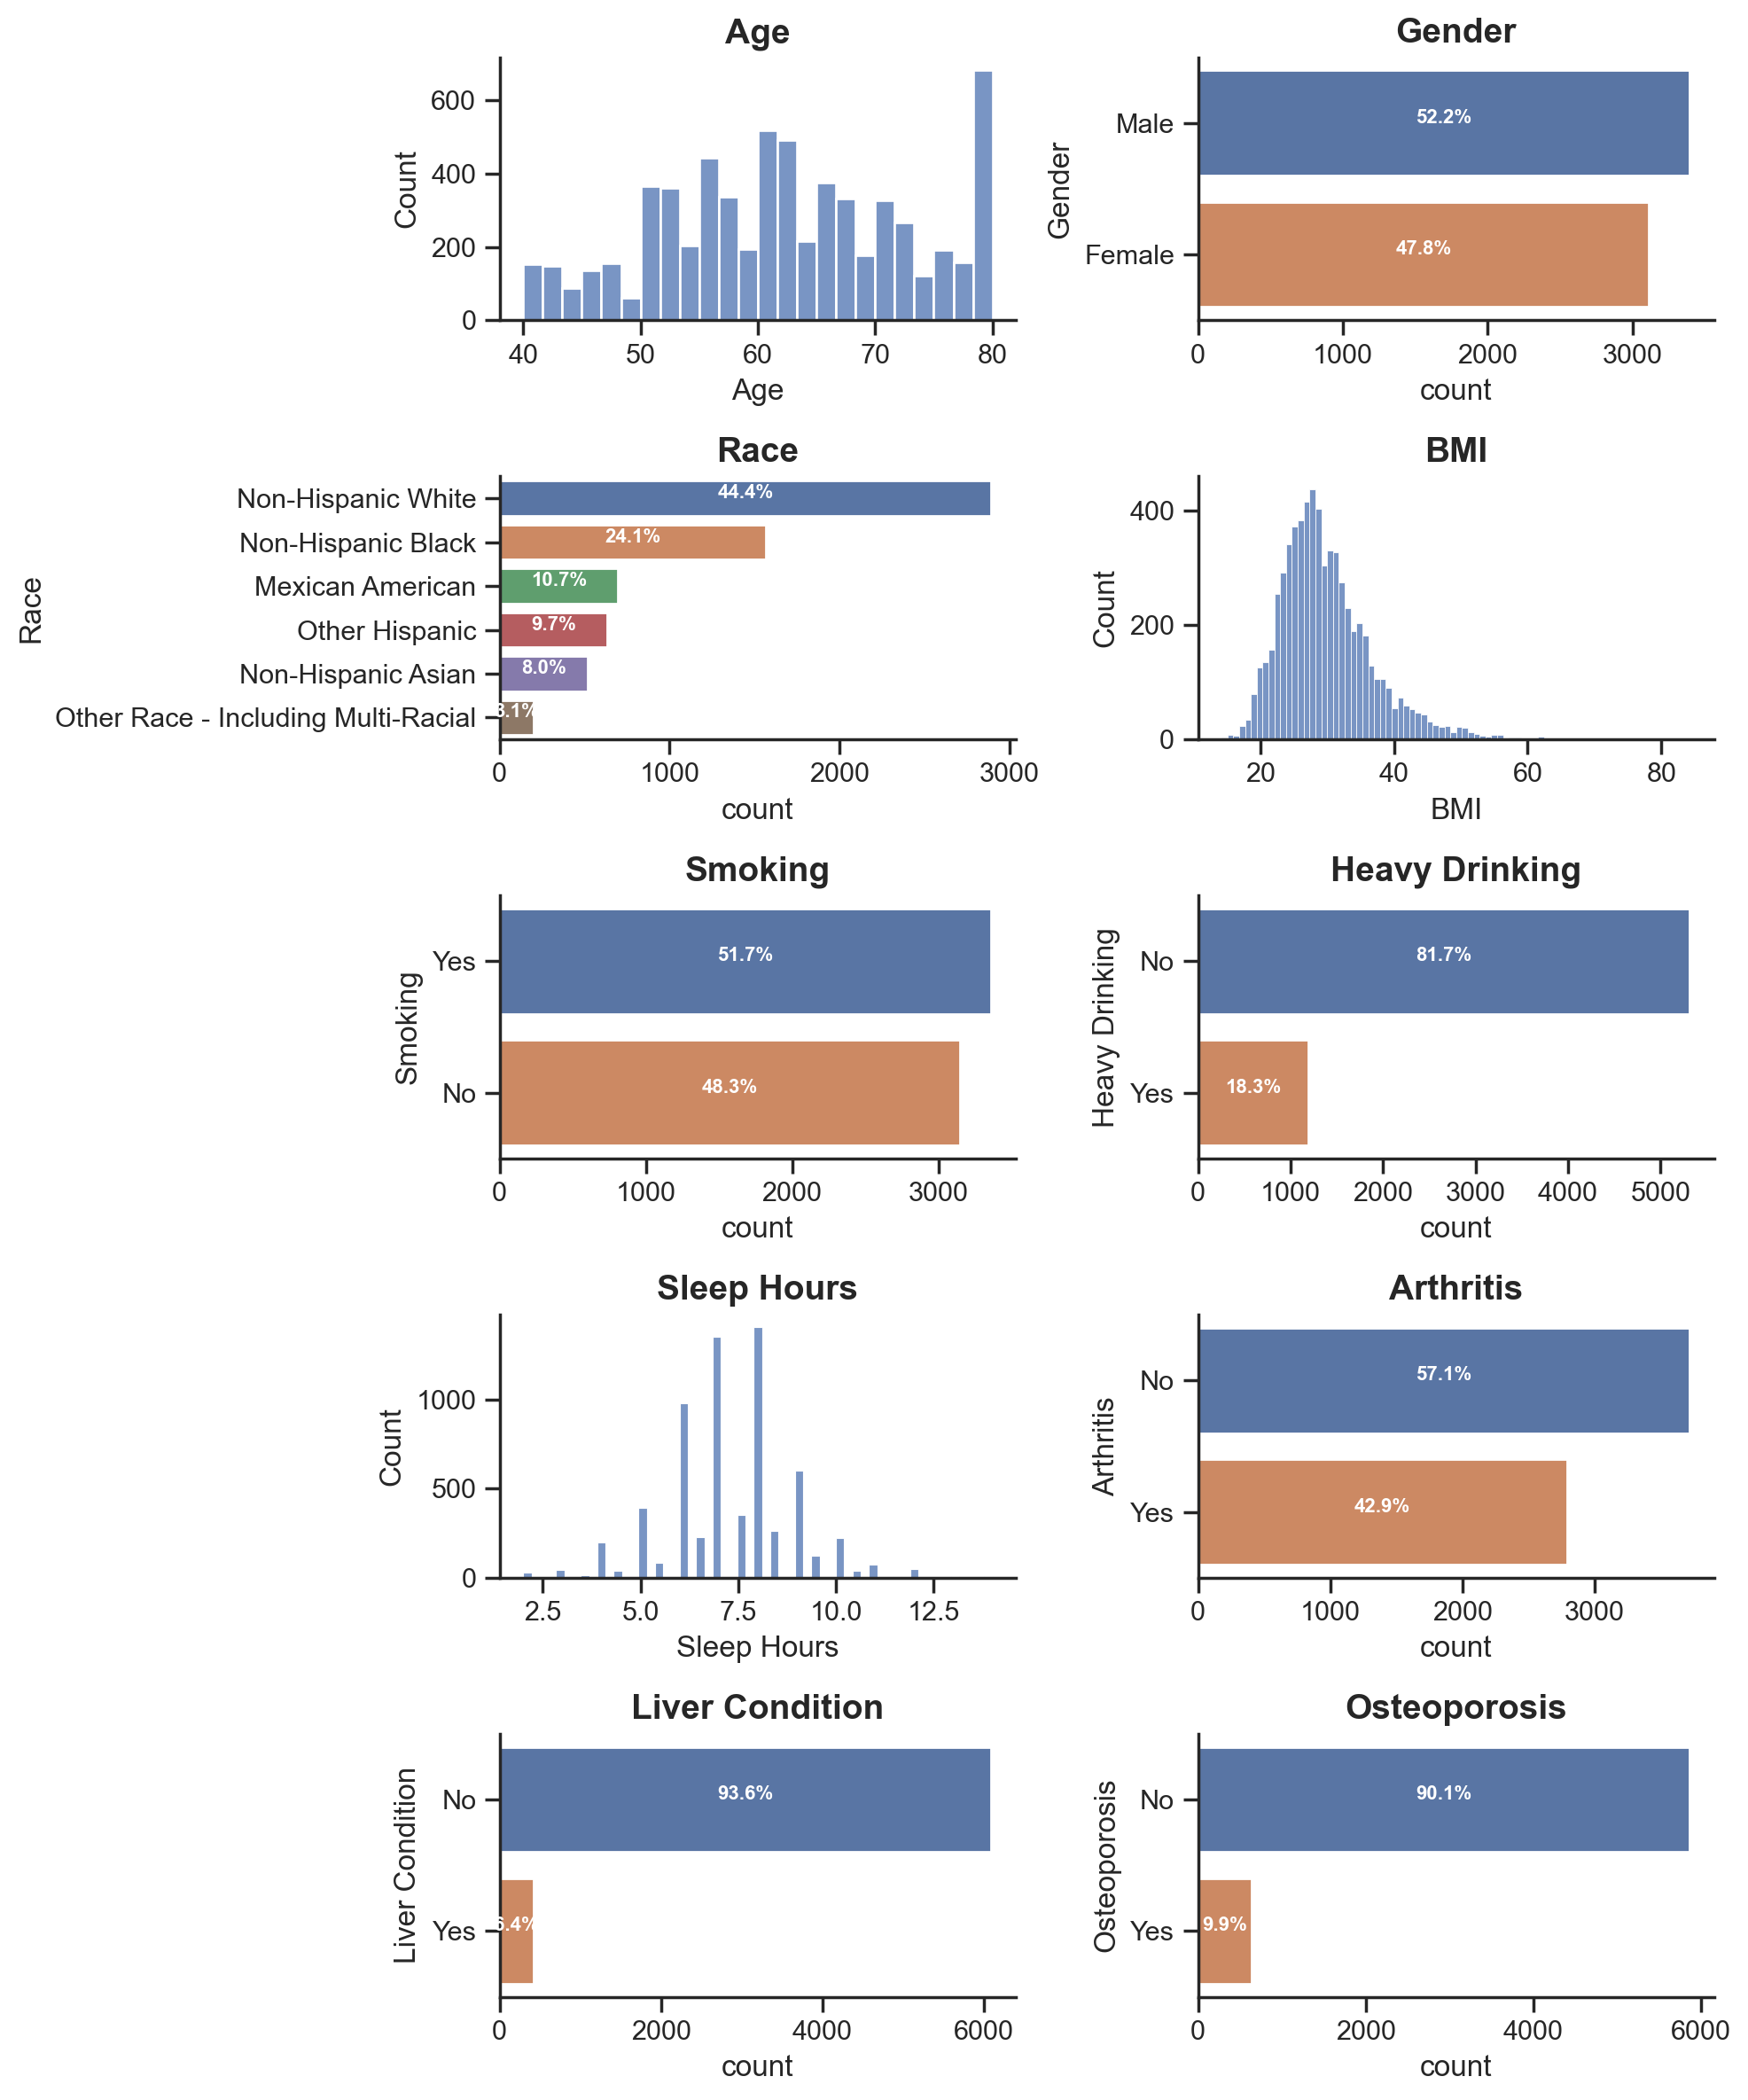

In [26]:
plt.figure(figsize=(10, 12))
multi_countplot(df_merged, var_list=df_merged.columns.tolist())

The dataset is highly imbalanced, the size of data with Osteoporosis vs. Non Osteoporosis is about 1:9, which may lead to lower sensitivity results in machine learning.

### 7.2 Osteoporosis by Gender

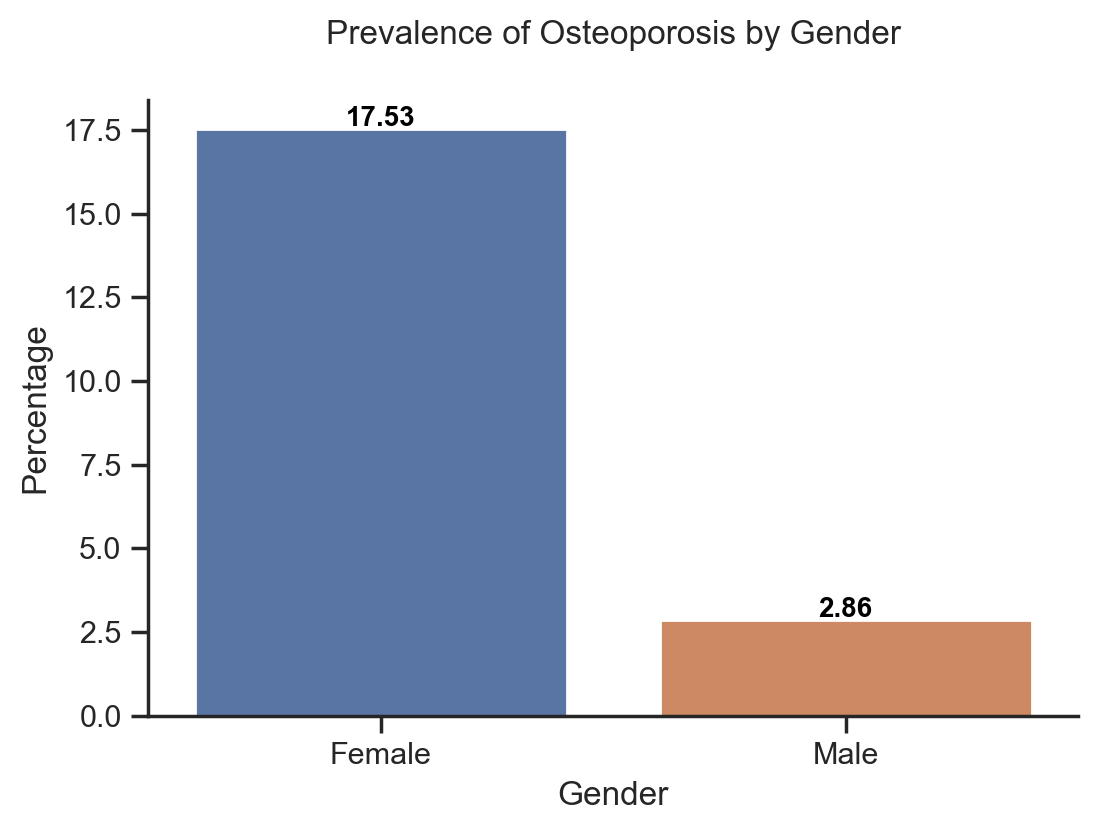

In [27]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged, 
                   var_col='Gender', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Gender')
plt.show()

Women had 6.1 times the prevalence of osteoporosis compared to men.

#### Prevalence Ratio (95% CI)

In [28]:
# female vs male prevalence ratio
df_oste_gender = (
                    df_merged.groupby(['Gender', 'Osteoporosis'])
                    .size()
                    .unstack()
                    .transpose()
                 )

pr_gender = get_prevalence_ratios(df_oste_gender, reference_group='Male')
pr_gender

Predictor           PR (95% CI) Statistically Significant
0      Male                   ref                          
1    Female  6.137 (4.972, 7.574)                       Yes

After accounting for sampling variability, the risk of getting osteoporosis for females was 5-7.6 times the risk for males.

### 7.3 Osteoporosis by Age

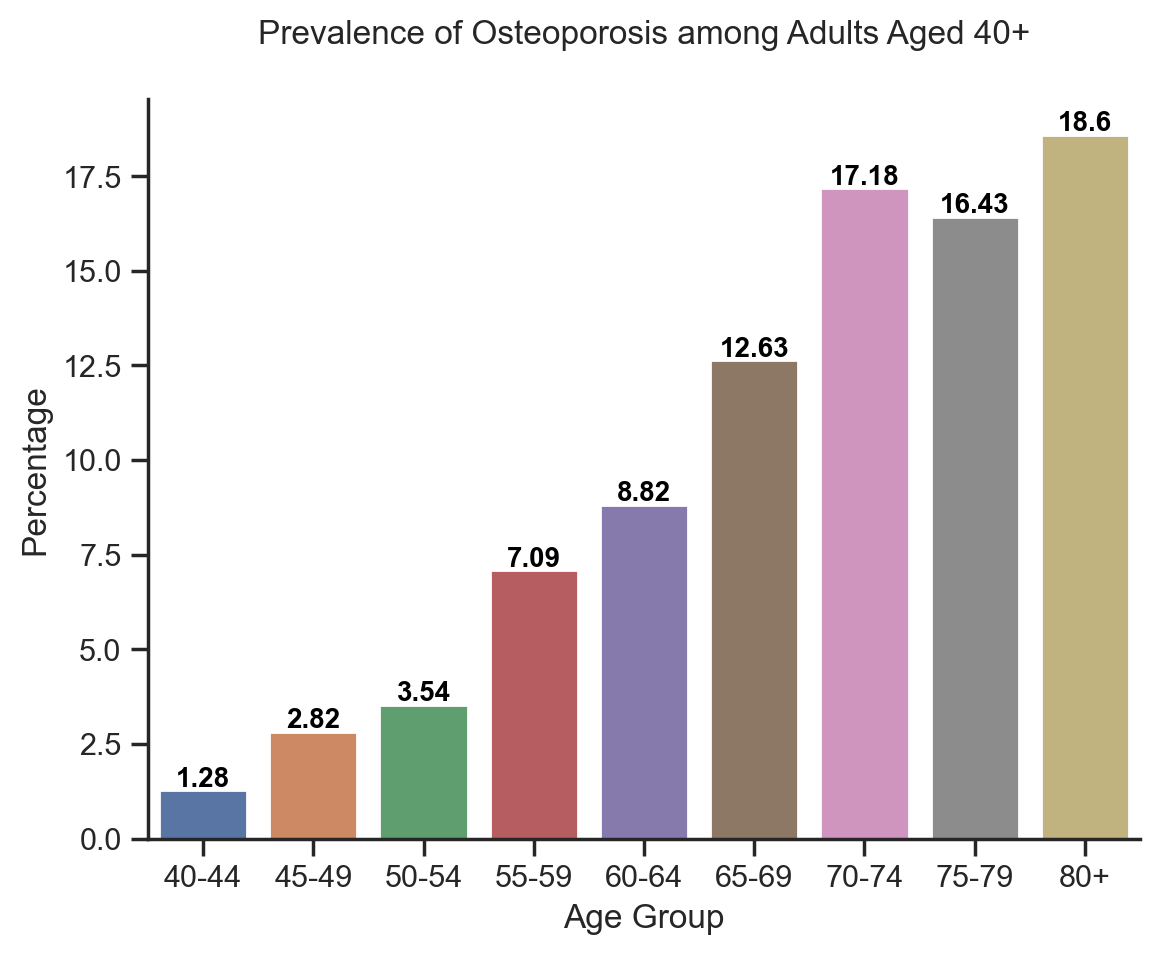

In [29]:
df_age_group = number_to_category(df_merged, var_col='Age', new_var_col='Age Group')
barplot_percentage(df_age_group, 
                   var_col='Age Group', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis among Adults Aged 40+')
plt.show()

The prevalence of osteoporosis increases with age. Is there any difference between female and male?

#### 7.3.1 Male vs. Female

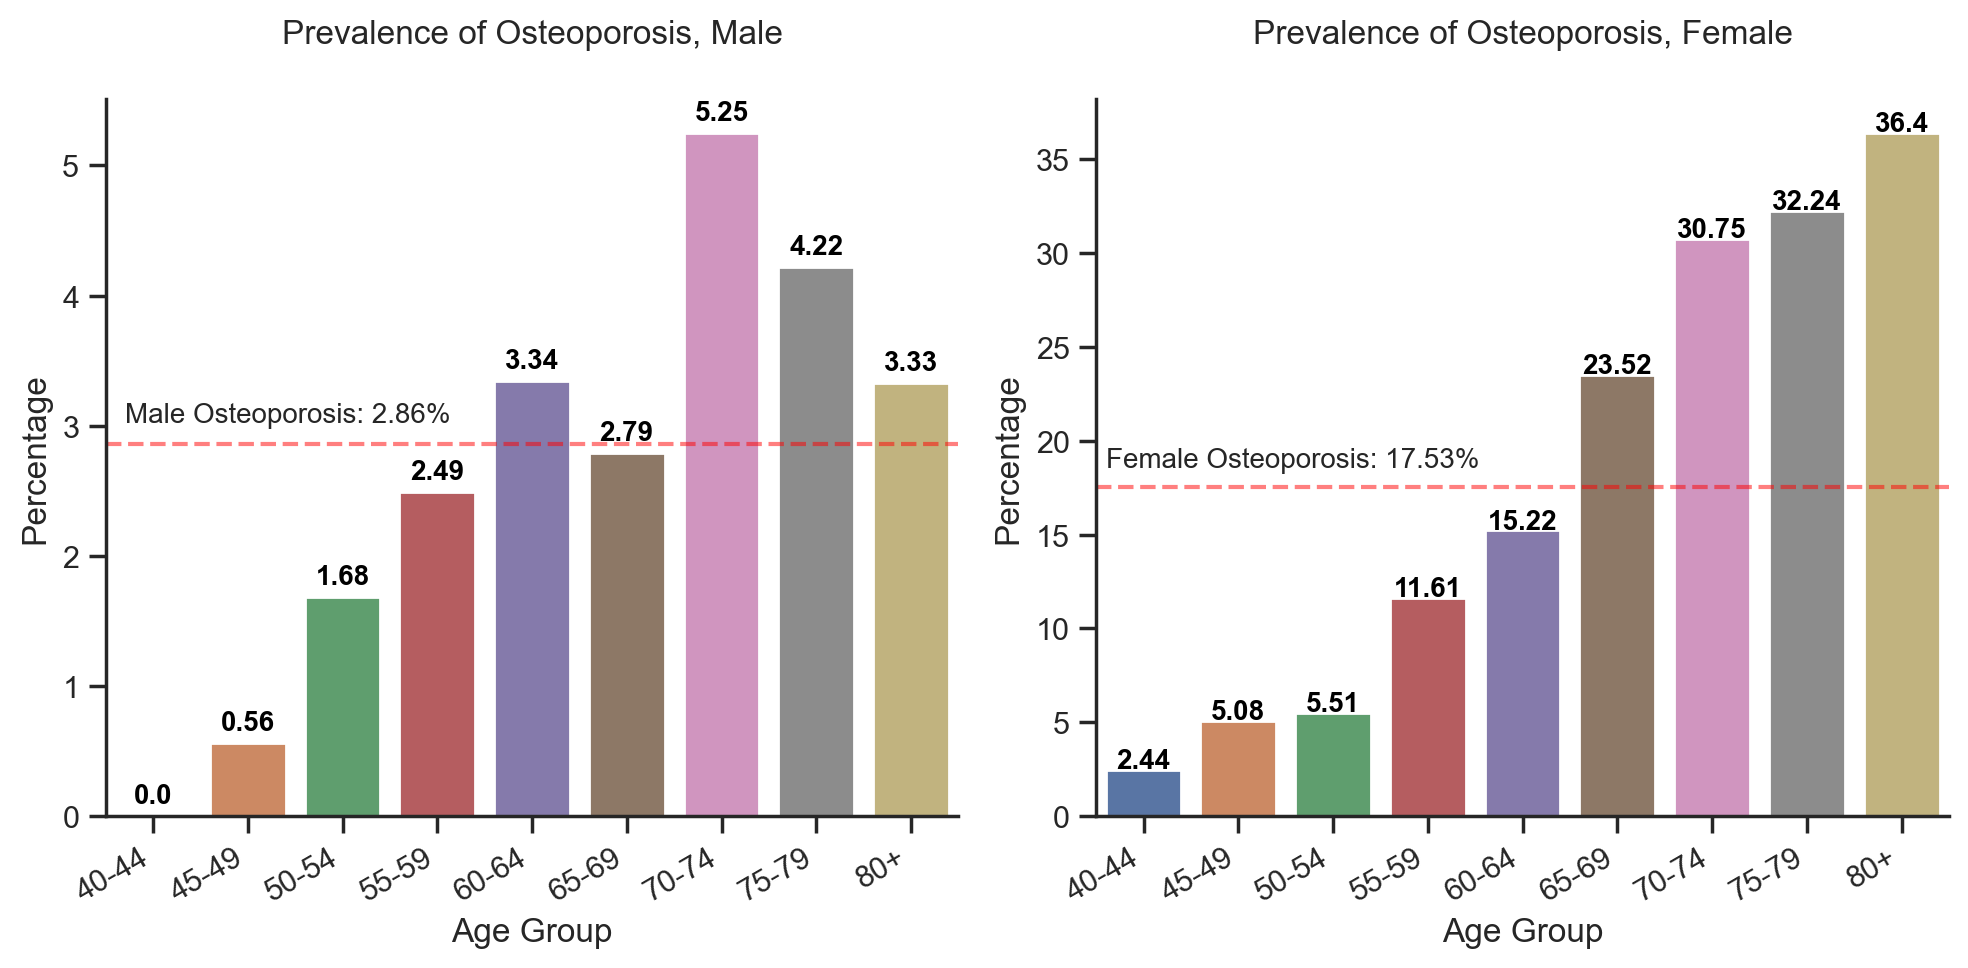

In [30]:
# get osteoporosis percentage by gender
df_gender_group = get_percentage(df_merged, var_col='Gender', target_col='Osteoporosis')
oste_pcnt_female = df_gender_group.loc[df_gender_group['Gender']=='Female', 'Percentage'].values[0]
oste_pcnt_male = df_gender_group.loc[df_gender_group['Gender']=='Male', 'Percentage'].values[0]


plt.figure(figsize=(10, 5))
plot_both_gender(data=df_age_group, 
                 var_col='Age Group', 
                 target_col='Osteoporosis',
                 text_male=oste_pcnt_male, 
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.3,
                 annotate_x_female=-0.4,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=30
                )

Aging affected osteoporosis differently by sex.

The prevelance of Osteoporosis for 65-69 women increased significantly compared to 60-64 women. Women aged 80+ have the highest prevelance of 36.4%.

For men, there is no linear relationship between age and prevalence. The prevalence of osteoporosis with the highest peak 5.25% at the age of 70-74 but then decreased. 

The prevalence ratio of 65-69 vs. 60-64 for male and female are 0.83 and 1.55 respectively. Are the results statistically significant?

#### 7.3.2 Prevalence Ratio for Male (95% CI)

Set '60-64' as the reference group.

In [31]:
df_grouped_male = gender_groupby(data=df_age_group, gender='Male', 
                            var_col='Age Group', 
                            target_col='Osteoporosis')

pr_age_male = get_prevalence_ratios(df_grouped_male, reference_group='60-64')
pr_age_male

Predictor           PR (95% CI) Statistically Significant
0     60-64                   ref                          
1     40-44        0.0 (0.0, nan)                        No
2     45-49   0.168 (0.023, 1.24)                        No
3     50-54  0.502 (0.226, 1.119)                        No
4     55-59  0.746 (0.373, 1.492)                        No
5     65-69  0.836 (0.425, 1.642)                        No
6     70-74   1.572 (0.87, 2.843)                        No
7     75-79   1.264 (0.607, 2.63)                        No
8       80+   0.998 (0.49, 2.034)                        No

#### 7.3.3 Prevalence Ratio for Female (95% CI)

In [32]:
df_grouped_f = gender_groupby(data=df_age_group, gender='Female', 
                            var_col='Age Group', 
                            target_col='Osteoporosis')

pr_age_female = get_prevalence_ratios(df_grouped_f, reference_group='60-64')
pr_age_female

Predictor           PR (95% CI) Statistically Significant
0     60-64                   ref                          
1     40-44   0.16 (0.066, 0.389)                       Yes
2     45-49   0.334 (0.172, 0.65)                       Yes
3     50-54  0.362 (0.236, 0.555)                       Yes
4     55-59  0.763 (0.558, 1.042)                        No
5     65-69  1.545 (1.191, 2.003)                       Yes
6     70-74     2.02 (1.569, 2.6)                       Yes
7     75-79   2.118 (1.591, 2.82)                       Yes
8       80+  2.391 (1.866, 3.065)                       Yes

### 7.4 Osteoporosis by Race

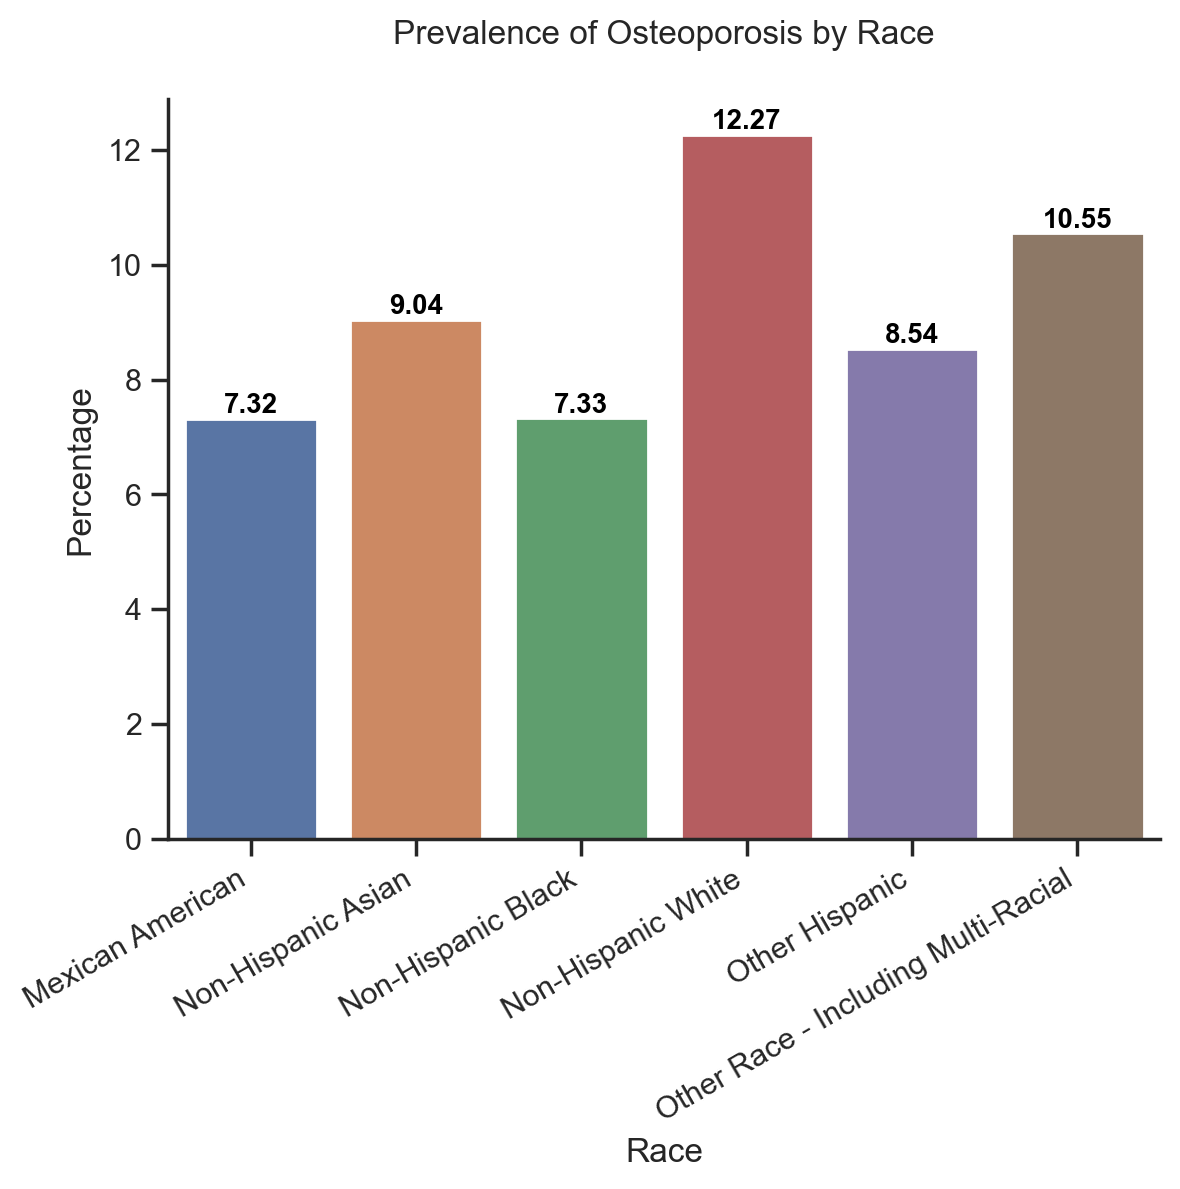

In [33]:
ax = barplot_percentage(df_merged, 
                   var_col='Race', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### 7.4.1 Male vs. Female

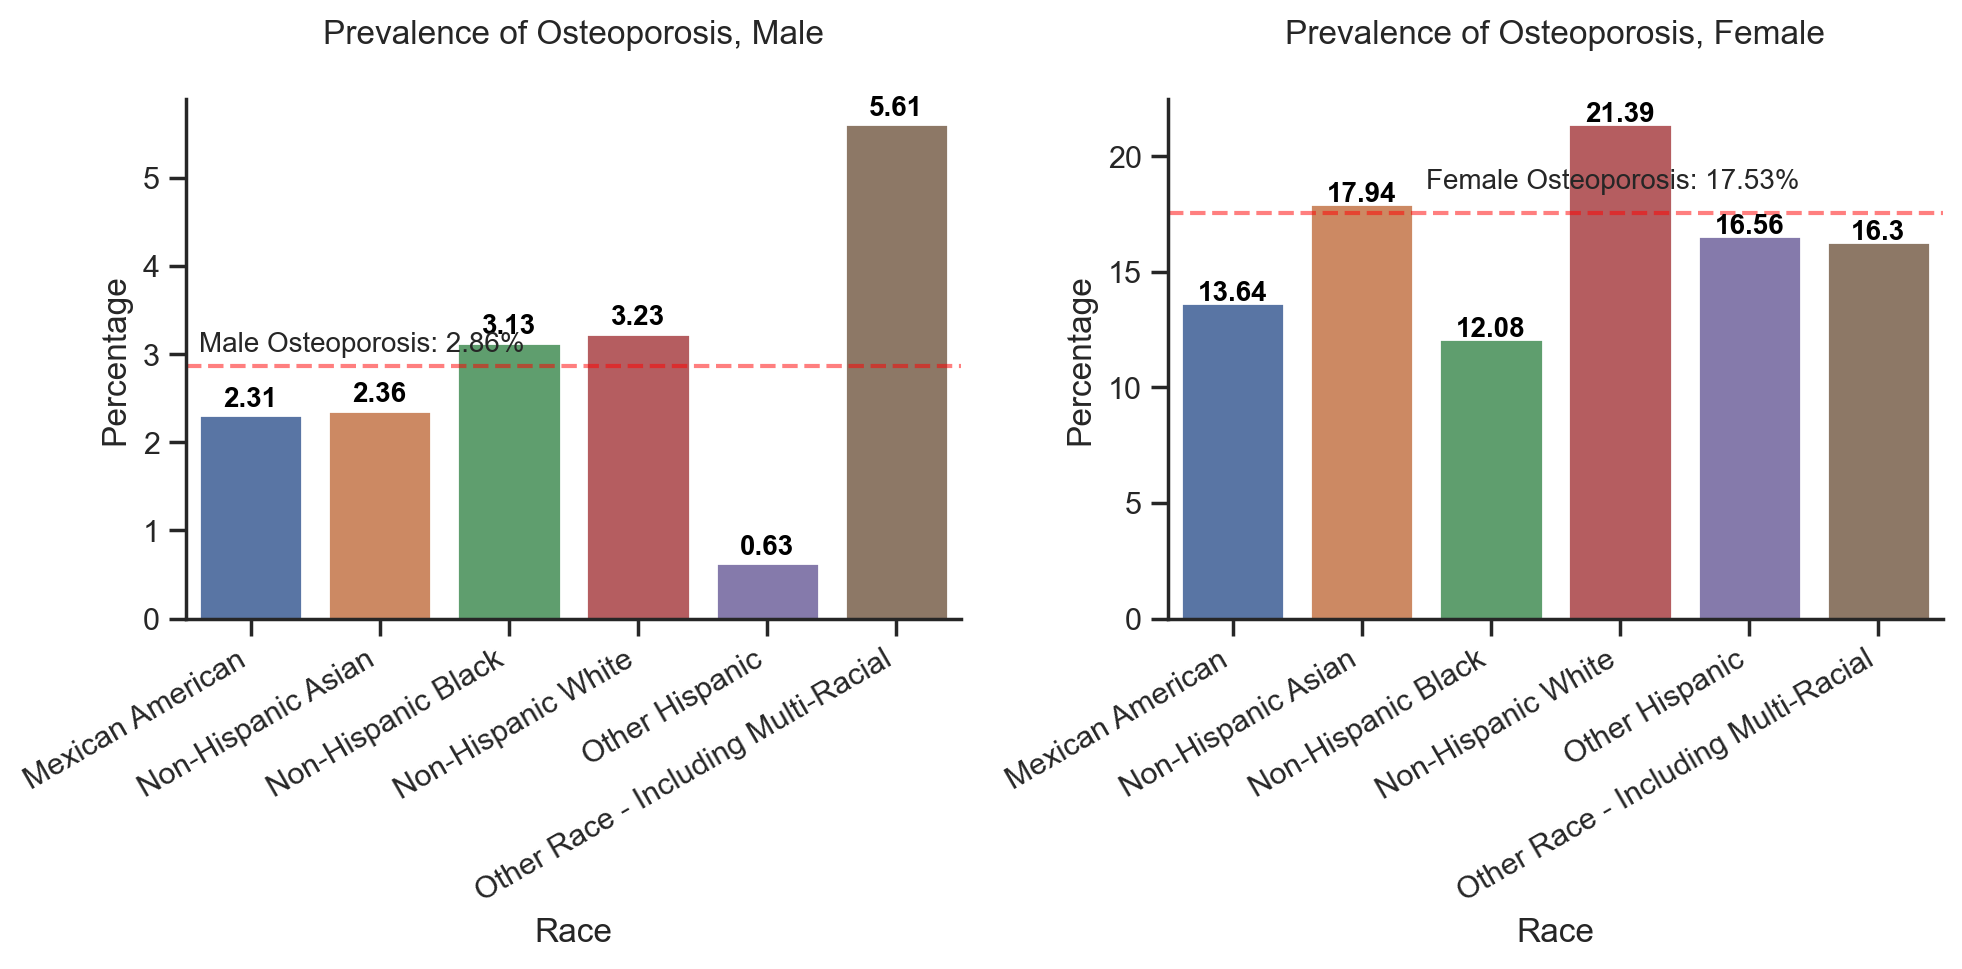

In [34]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Race', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.4,
                 annotate_x_female=1.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=30
                )

Osteoporosis prevalence differs among men and women by race. For men, "Other Race" had the highest prevalence, while for women, "Non-Hispanic White" had the highest prevalence.

If we set "Mexican American" as the reference group, "Non-Hispanic White" had higher risk for both men and women. Are the results statistically significant?

#### 7.4.2 Prevalence Ratio for Male (95% CI)

Set 'Mexican American' as the reference group.

In [35]:
df_grouped_m = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Race', 
                            target_col='Osteoporosis')
pr_race_male = get_prevalence_ratios(df_grouped_m, reference_group='Mexican American')
pr_race_male

Predictor           PR (95% CI)  \
0                     Mexican American                   ref   
1                   Non-Hispanic Asian  1.019 (0.384, 2.704)   
2                   Non-Hispanic Black   1.352 (0.64, 2.858)   
3                   Non-Hispanic White  1.398 (0.691, 2.828)   
4                       Other Hispanic  0.272 (0.059, 1.249)   
5  Other Race - Including Multi-Racial  2.424 (0.882, 6.659)   

  Statistically Significant  
0                            
1                        No  
2                        No  
3                        No  
4                        No  
5                        No

#### 7.4.3 Prevalence Ratio for Female (95% CI)

In [36]:
df_grouped_f = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Race', 
                            target_col='Osteoporosis')
pr_race_female = get_prevalence_ratios(df_grouped_f, reference_group='Mexican American')
pr_race_female

Predictor           PR (95% CI)  \
0                     Mexican American                   ref   
1                   Non-Hispanic Asian  1.315 (0.884, 1.957)   
2                   Non-Hispanic Black  0.886 (0.629, 1.247)   
3                   Non-Hispanic White  1.569 (1.164, 2.113)   
4                       Other Hispanic  1.214 (0.835, 1.767)   
5  Other Race - Including Multi-Racial  1.196 (0.696, 2.055)   

  Statistically Significant  
0                            
1                        No  
2                        No  
3                       Yes  
4                        No  
5                        No

### 7.5 Osteoporosis by BMI

According to [CDC](https://www.cdc.gov/obesity/basics/adult-defining.html), BMI can be interpreated to 4 groups: 
- Underweight (below 18.5)
- Healthy Weight (18.5 <= BMI < 25)
- Overweight (25.0 <= BMI < 30)
- Obesity (30.0 or higher)

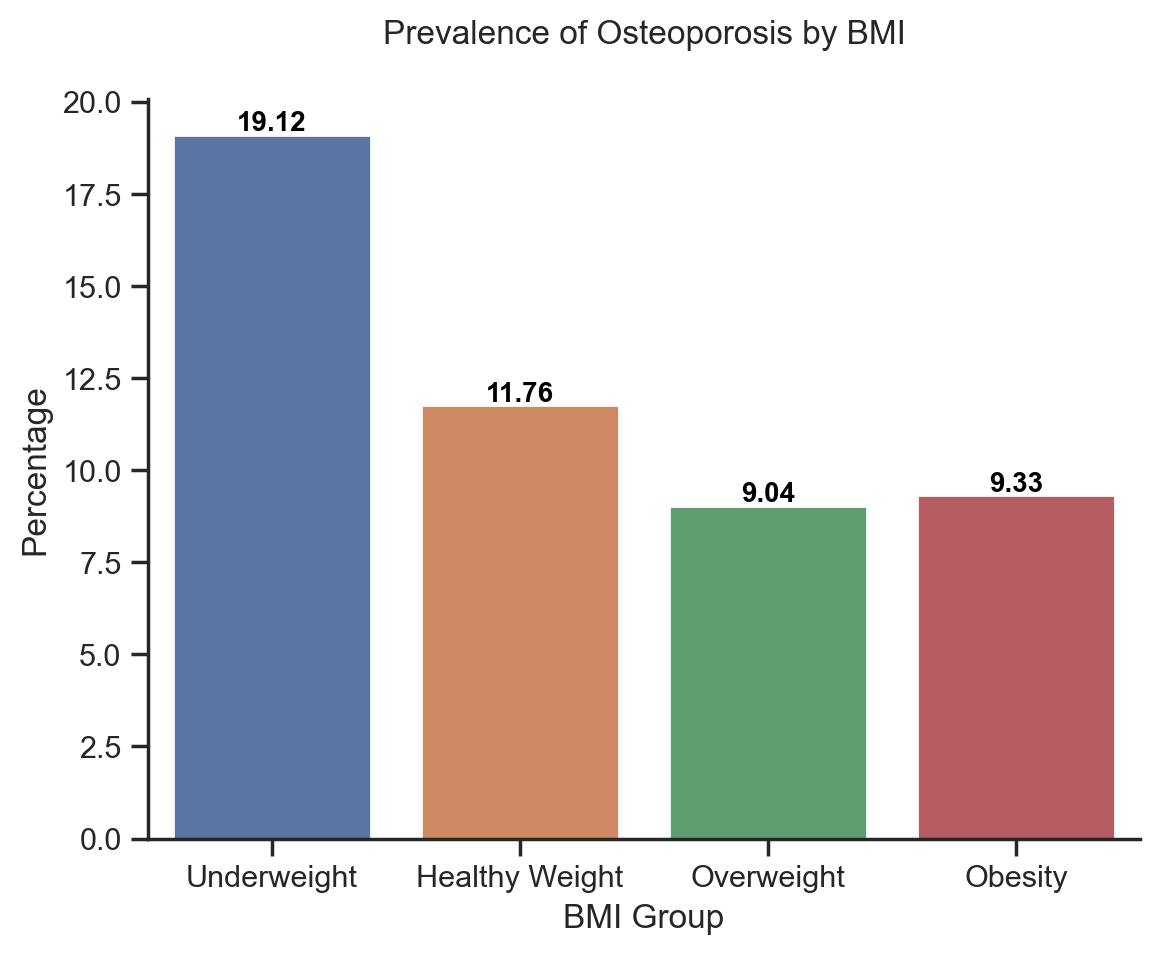

In [37]:
df_bmi_group = number_to_category(df_merged, var_col='BMI', new_var_col='BMI Group')
bmi_order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']
barplot_percentage(df_bmi_group,
                   var_col='BMI Group', 
                   target_col='Osteoporosis',
                   order = bmi_order,
                   title='Prevalence of Osteoporosis by BMI')
plt.show()

Osteoporosis was associated with underweight. Underweight people had 63% higher risk of Osteoporosis when compared to healthy weight people.

Again, let's check the difference by gender.
#### 7.5.1 Male vs. Female

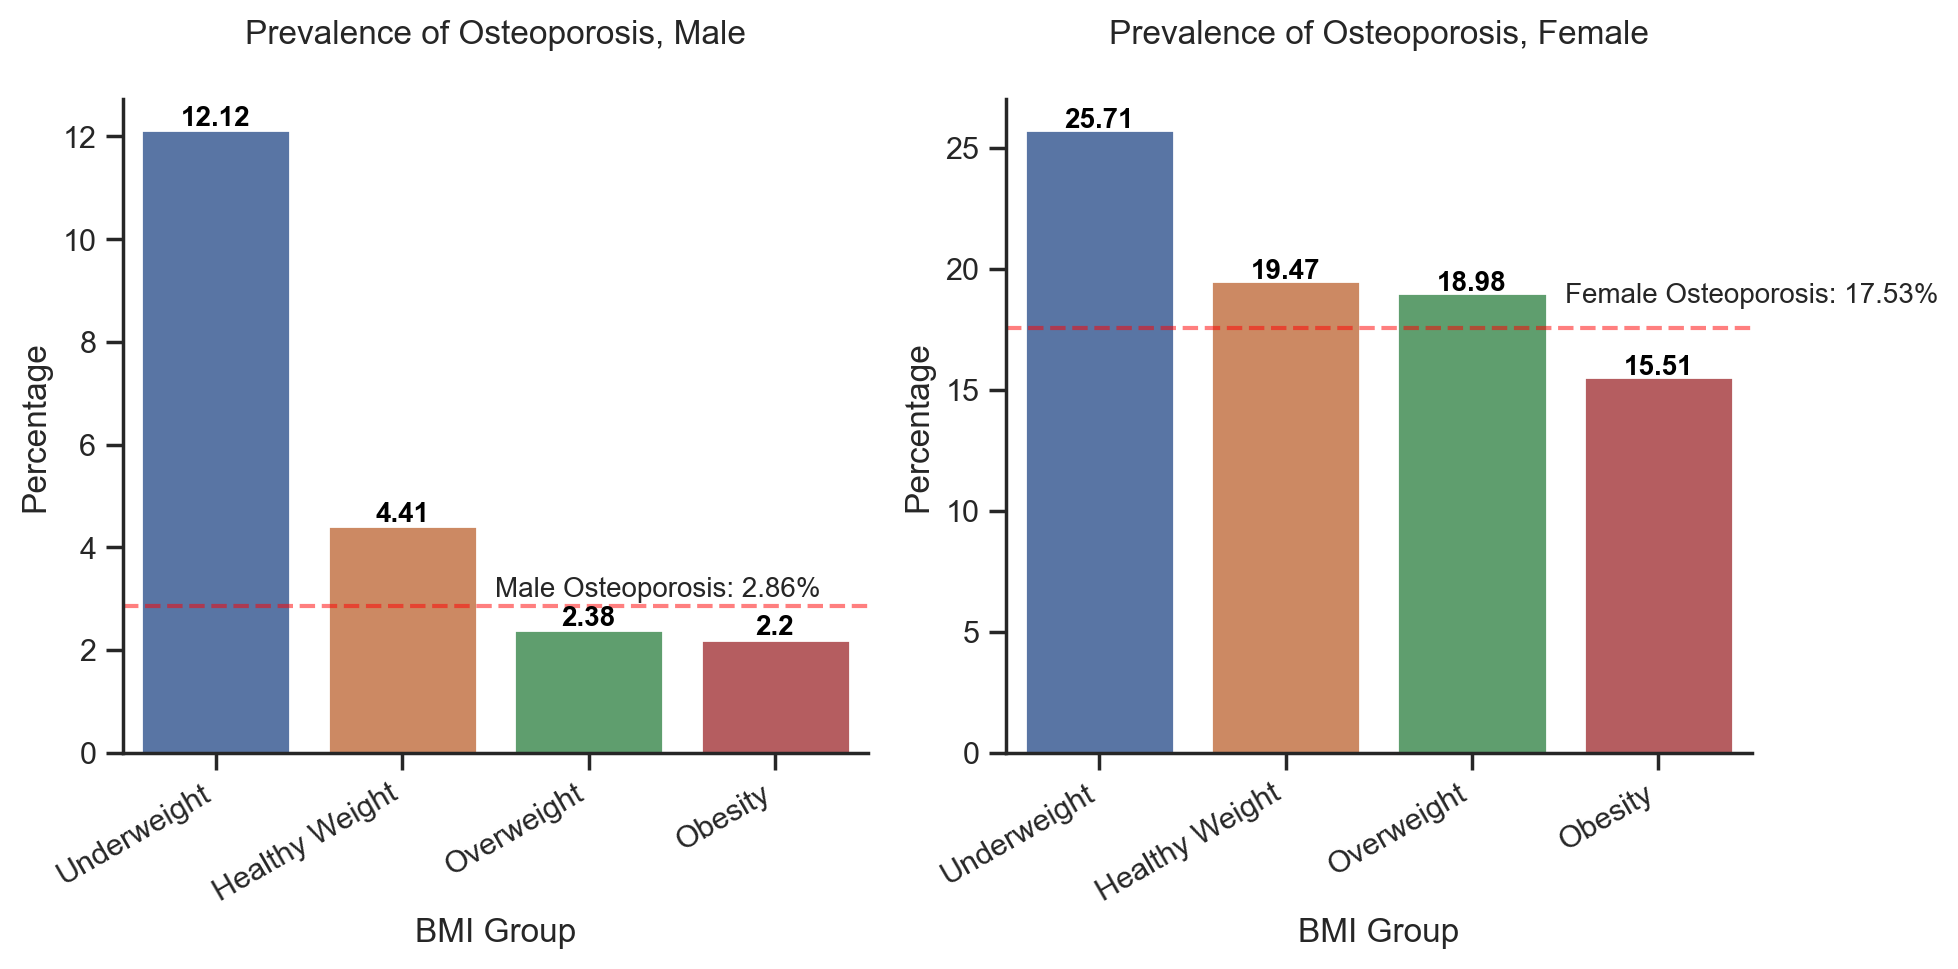

In [38]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_bmi_group, 
                 var_col='BMI Group', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=1.5,
                 annotate_x_female=2.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 order=bmi_order,
                 x_tick_rotation=30
                )

For both men and women, underweight respondents had higher prevalence of osteoporosis compared to healthy weight respondents, the prevalance ratio is 2.74 and 1.32 respectively. Interestingly, the prevalence of Osteoporosis tended to be lowest in obese people.
Are the results statistically significant?

#### 7.5.2 Prevalence Ratio for Male (95% CI)

Set 'Healthy Weight' as the reference group:

In [39]:
df_grouped_male = gender_groupby(data=df_bmi_group, gender='Male', 
                            var_col='BMI Group', 
                            target_col='Osteoporosis')
pr_bmi_male = get_prevalence_ratios(df_grouped_male, reference_group='Healthy Weight')
pr_bmi_male

Predictor           PR (95% CI) Statistically Significant
0  Healthy Weight                   ref                          
1         Obesity     0.5 (0.304, 0.82)                       Yes
2      Overweight    0.54 (0.335, 0.87)                       Yes
3     Underweight  2.747 (1.034, 7.301)                       Yes

Obese and overweight men have a lower risk of osteoporosis than men of a healthy weight.
But men who were underweight had a higher risk of osteoporosis than men who were healthy weight.

#### 7.5.3  Prevalence Ratio for Female (95% CI)

In [40]:
df_grouped_female = gender_groupby(data=df_bmi_group, gender='Female', 
                            var_col='BMI Group', 
                            target_col='Osteoporosis')
pr_bmi_female = get_prevalence_ratios(df_grouped_female, reference_group='Healthy Weight')
pr_bmi_female

Predictor           PR (95% CI) Statistically Significant
0  Healthy Weight                   ref                          
1         Obesity  0.796 (0.658, 0.964)                       Yes
2      Overweight  0.975 (0.797, 1.192)                        No
3     Underweight  1.321 (0.738, 2.365)                        No

### 7.6 Osteoporosis by Alcohol

Alcohol data on "Heavy Drinking" are answers to the question "Ever have 4/5 or more drinks every day". According to the [National Institute on Alcohol Abuse and Alcoholism](https://www.niaaa.nih.gov/alcohol-health/overview-alcohol-consumption/moderate-binge-drinking), heavy drinking is defined as consuming more than 4 drinks on any day for men, or consuming more than 3 drinks on any day or women.

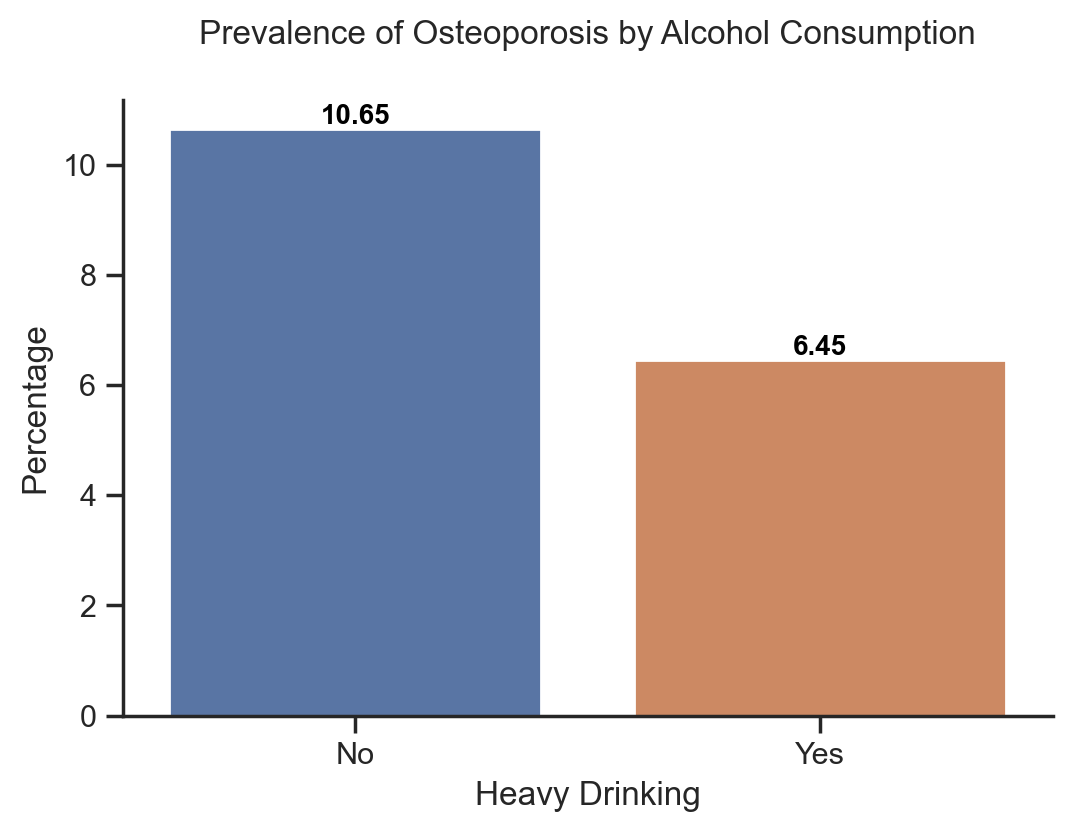

In [41]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Heavy Drinking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Alcohol Consumption'
                  )
plt.show()

The risk of getting osteoporosis for people who never had 4/5 or more drinks every day was 1.65 times the risk for those who ever had. This result is somewhat inconsistent with the common sense that alcohol is harmful to bone health. Why? Did heavy alcohol use affect men and women differently?


#### 7.6.1 Male vs. Female

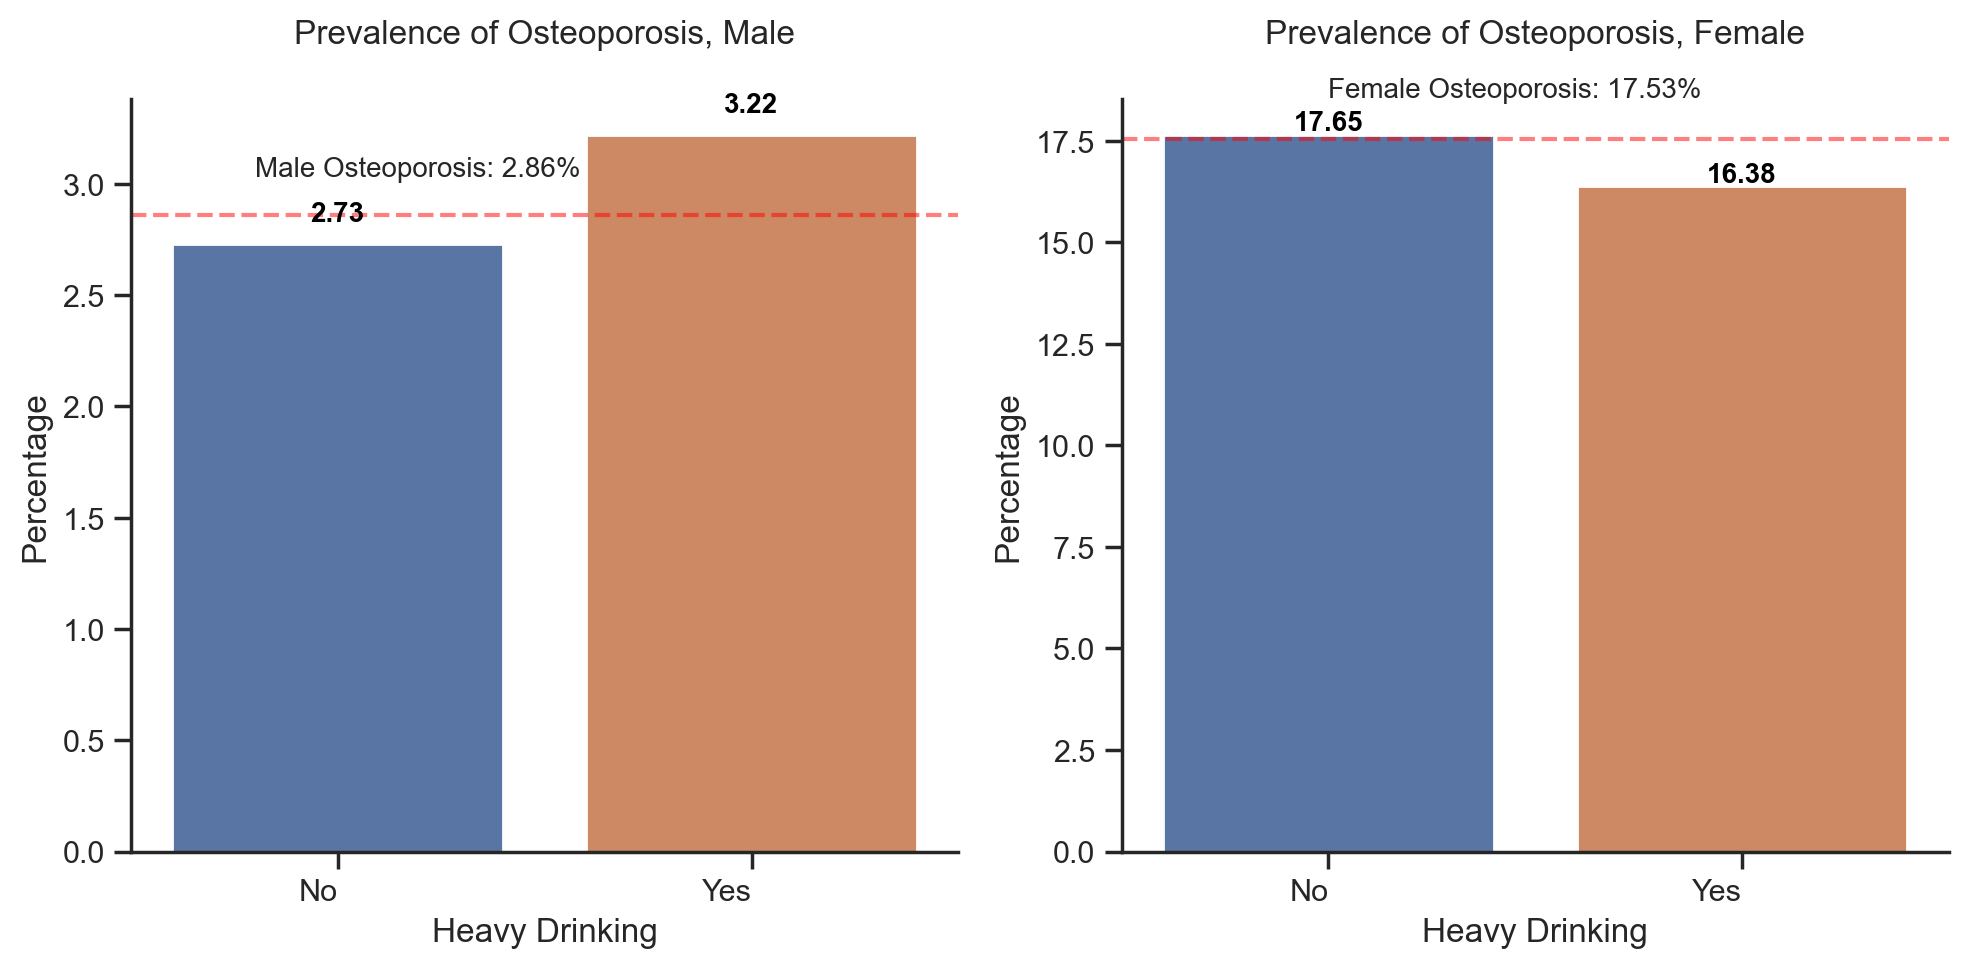

In [42]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Heavy Drinking', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=0,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

According to the chart for male, male respondents who ever drank heavily had 18% higher risk of osteoporosis when compared to those who never did so. While women were just the opposite, those who ever drank heavily had 7% lower risk of osteoporosis.

But neither 18% nor 7% sounds big enough. Are these results statistically significant?

#### 7.6.2 Prevalence Ratio for Male (95% CI)

In [43]:
df_grouped_male = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Heavy Drinking', 
                            target_col='Osteoporosis')
pr_alcho_male = get_prevalence_ratios(df_grouped_male, reference_group='No')
pr_alcho_male

Predictor          PR (95% CI) Statistically Significant
0        No                  ref                          
1       Yes  1.18 (0.769, 1.811)                        No

#### 7.6.3 Prevalence Ratio for Female (95% CI)

Next, let's calculate the 95% confidence interval for female:

In [44]:
df_grouped_female = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Heavy Drinking', 
                            target_col='Osteoporosis')
df_grouped_female = get_prevalence_ratios(df_grouped_female, reference_group='No')
df_grouped_female

Predictor           PR (95% CI) Statistically Significant
0        No                   ref                          
1       Yes  0.928 (0.708, 1.216)                        No

In summary, we cannot draw any specific conclusions about how smoking affects osteoporosis. More detailed data is needed for further analysis.

### 7.7 Osteoporosis by Smoking

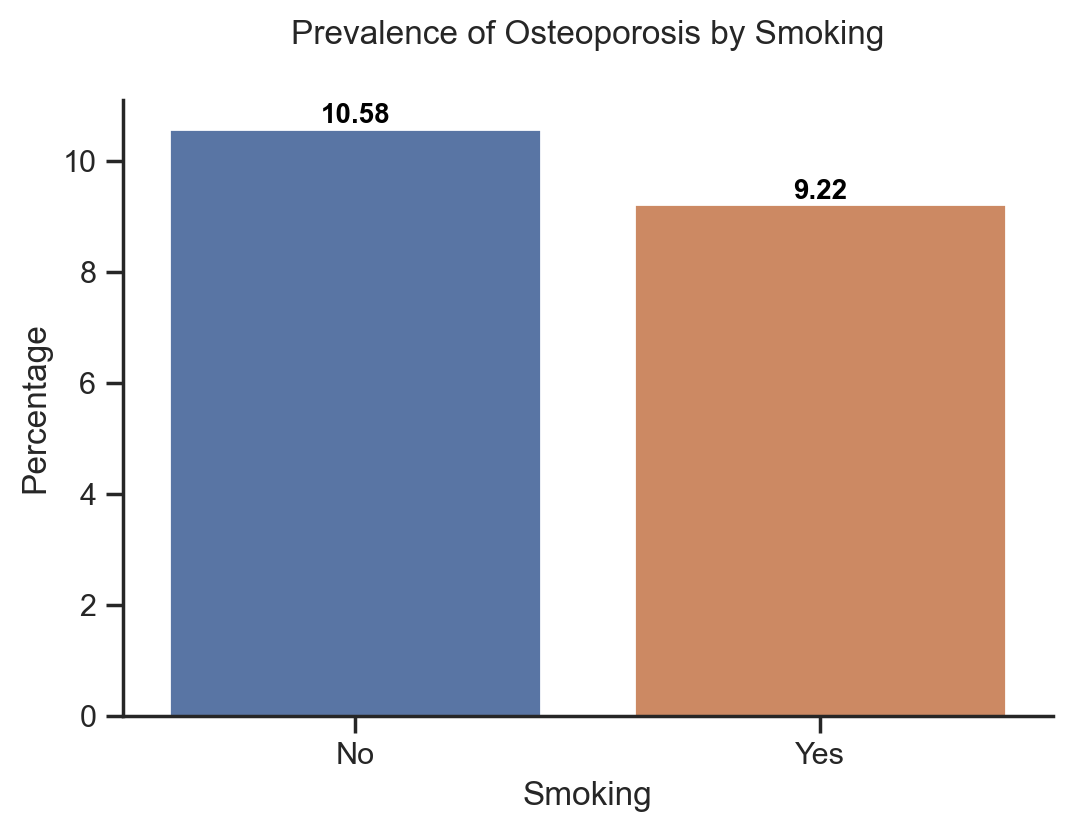

In [45]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Smoking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Smoking'
                  )
plt.show()

The risk for people who didn't smoke was 1.1 times the risk for those who smoked.

But it makes more sense to check the relative risk by gender.


#### 7.7.1 Male vs. Female

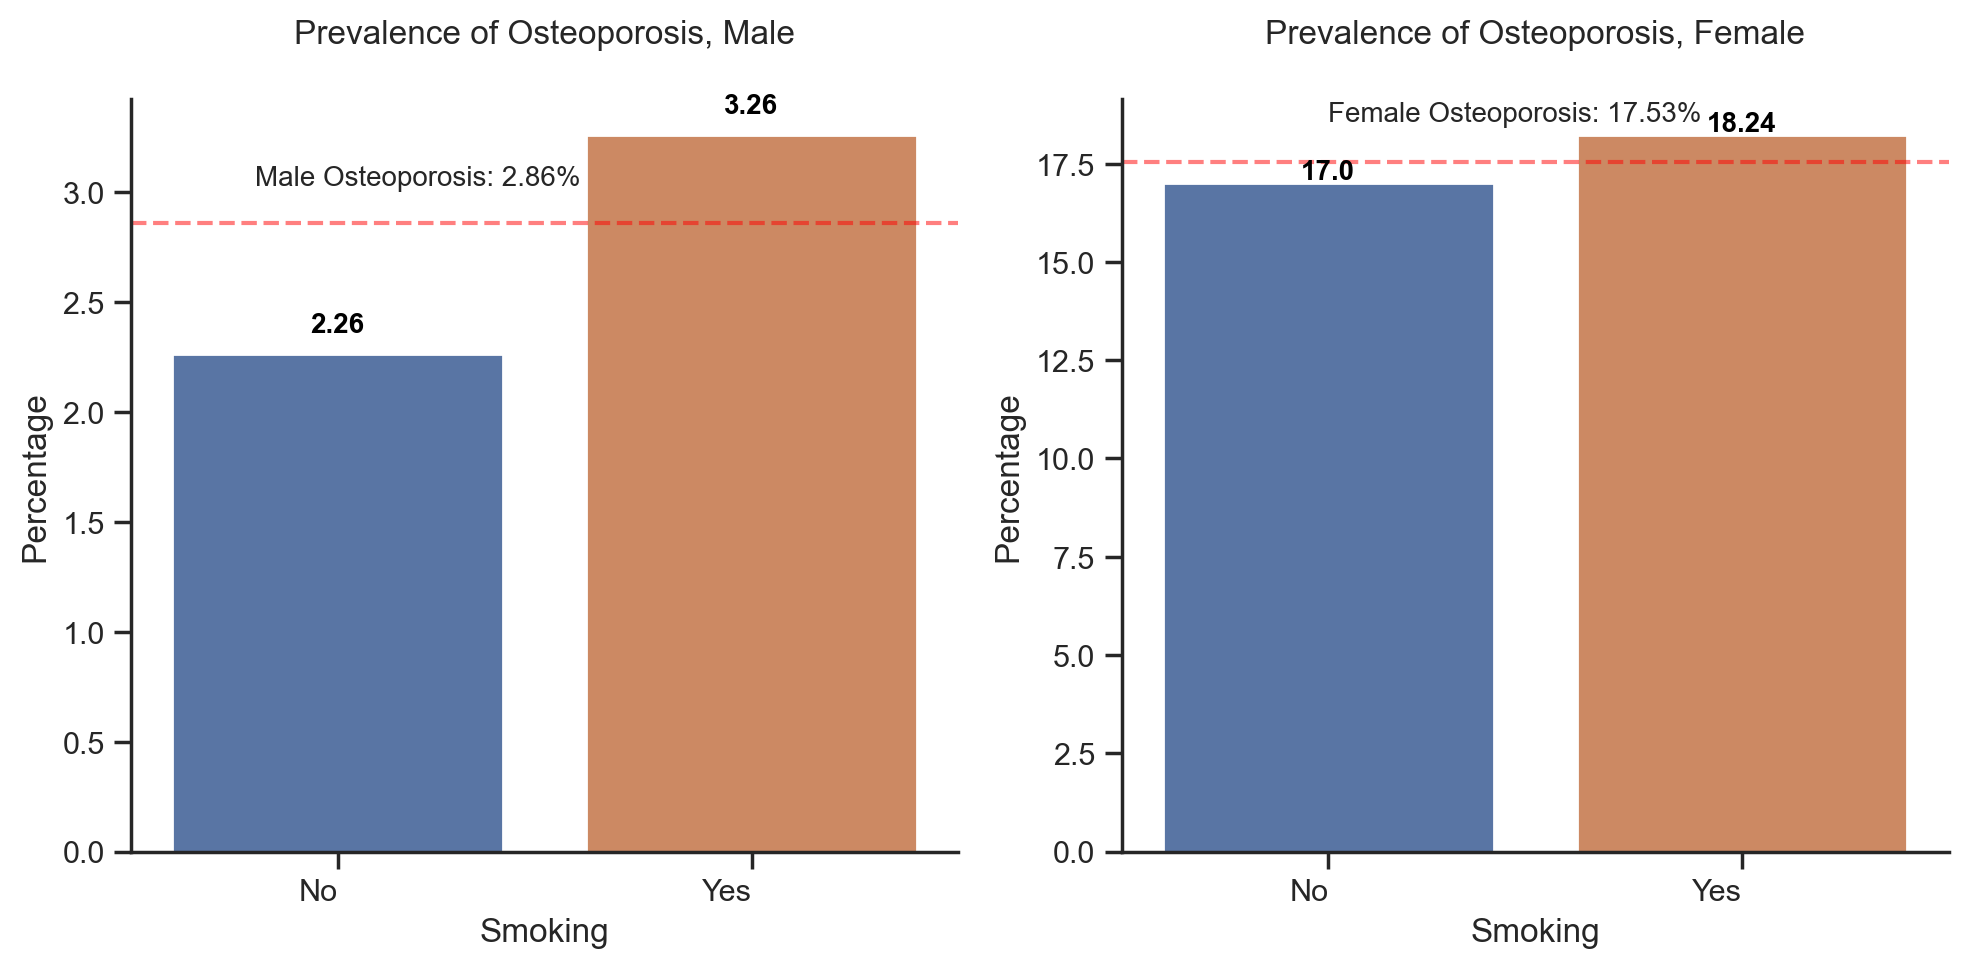

In [46]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Smoking', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=0,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

According to charts, men who smoke had 44% higher risk of osteoporosis when compared to those who didn't smoke. Same trend for women, those who smoke had 7% higher risk when compared to those who didn't smoke.

Next, let' check if these results are statistically significant.

#### 7.7.2 Prevalence Ratio for Male (95% CI)

In [47]:
df_grouped_male = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Smoking', 
                            target_col='Osteoporosis')
pr_smoke_male = get_prevalence_ratios(df_grouped_male, reference_group='No')
pr_smoke_male

Predictor          PR (95% CI) Statistically Significant
0        No                  ref                          
1       Yes  1.44 (0.945, 2.195)                        No

#### 7.7.3  Prevalence Ratio for Female (95% CI)

In [48]:
df_grouped_female = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Smoking', 
                            target_col='Osteoporosis')
pr_smoke_female = get_prevalence_ratios(df_grouped_female, reference_group='No')
pr_smoke_female

Predictor         PR (95% CI) Statistically Significant
0        No                 ref                          
1       Yes  1.072 (0.92, 1.25)                        No

In summary, we cannot get specific coonclusion about how smoking impact osteoporosis in this project. Further research is needed.

### 7.8 Osteoporosis by Sleep Hours

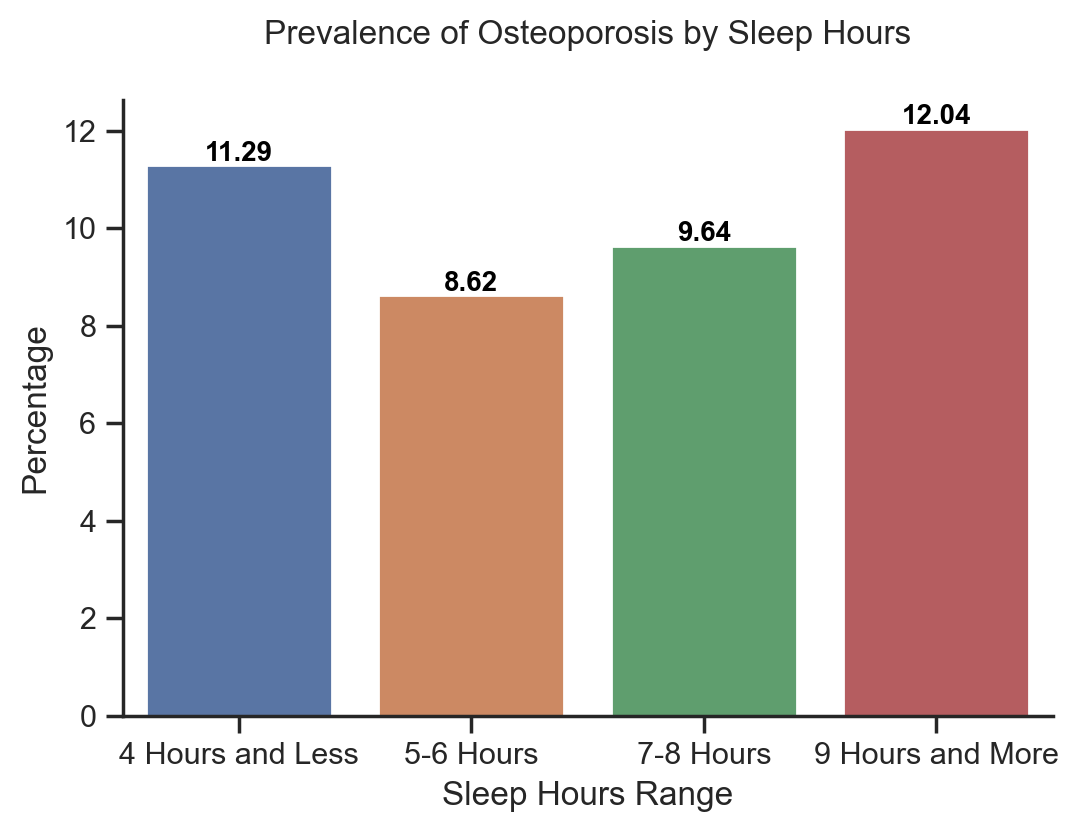

In [49]:
df_sleep_group = number_to_category(df_merged, var_col='Sleep Hours', new_var_col='Sleep Hours Range')
sleep_order = ['4 Hours and Less', '5-6 Hours', '7-8 Hours', '9 Hours and More']
plt.figure(figsize=(6, 4))
barplot_percentage(df_sleep_group, 
                   var_col='Sleep Hours Range', 
                   target_col='Osteoporosis',
                   order = sleep_order,
                   title='Prevalence of Osteoporosis by Sleep Hours')
plt.show()

#### 7.8.1 Male vs. Female

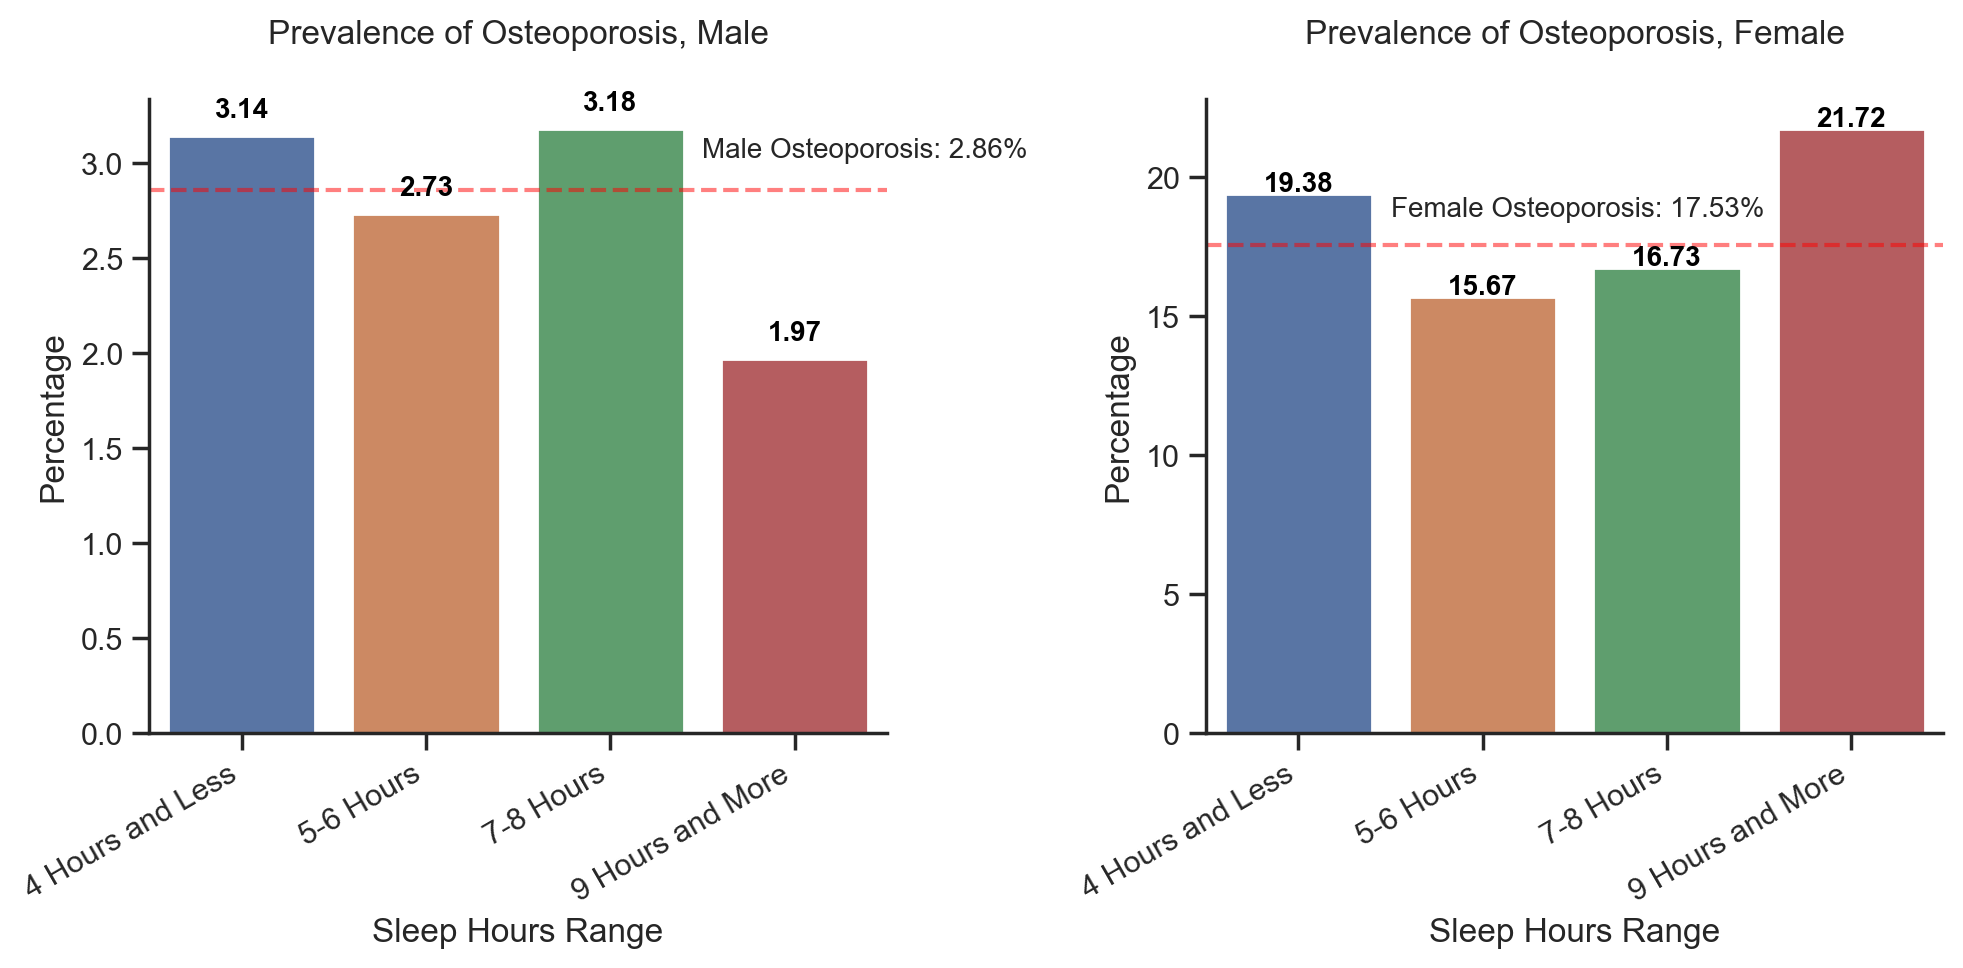

In [50]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_sleep_group, 
                 var_col='Sleep Hours Range', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=2.5,
                 annotate_x_female=0.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 order = sleep_order,
                 x_tick_rotation=30
                )

Sleep hours affected men and women differently, but non-linearly. For both men and women, 5-6 sleep hours were associated with lower prevalence of osteoporosis than 4 hours and less. Let's check if the relative risks are statistically significant.

#### 7.8.2 Prevalence Ratio for Male (95% CI)

Set '4 Hours and Less' as the reference group.

In [51]:
df_grouped_male = gender_groupby(data=df_sleep_group, gender='Male', 
                            var_col='Sleep Hours Range', 
                            target_col='Osteoporosis')
pr_sleep_male = get_prevalence_ratios(df_grouped_male, reference_group='4 Hours and Less')
pr_sleep_male

Predictor           PR (95% CI) Statistically Significant
0  4 Hours and Less                   ref                          
1         5-6 Hours  0.868 (0.337, 2.234)                        No
2         7-8 Hours  1.011 (0.411, 2.487)                        No
3  9 Hours and More  0.627 (0.221, 1.778)                        No

#### 7.8.3 Prevalence Ratio for Female (95% CI)

In [52]:
df_grouped_female = gender_groupby(data=df_sleep_group, gender='Female', 
                            var_col='Sleep Hours Range', 
                            target_col='Osteoporosis')
pr_sleep_female = get_prevalence_ratios(df_grouped_female, reference_group='4 Hours and Less')
pr_sleep_female

Predictor           PR (95% CI) Statistically Significant
0  4 Hours and Less                   ref                          
1         5-6 Hours  0.809 (0.566, 1.155)                        No
2         7-8 Hours  0.863 (0.618, 1.206)                        No
3  9 Hours and More  1.121 (0.789, 1.594)                        No

In summary, we cannot draw any specific conclusions about how sleep hours affects osteoporosis. Further study is required.

### 7.9 By Arthritis

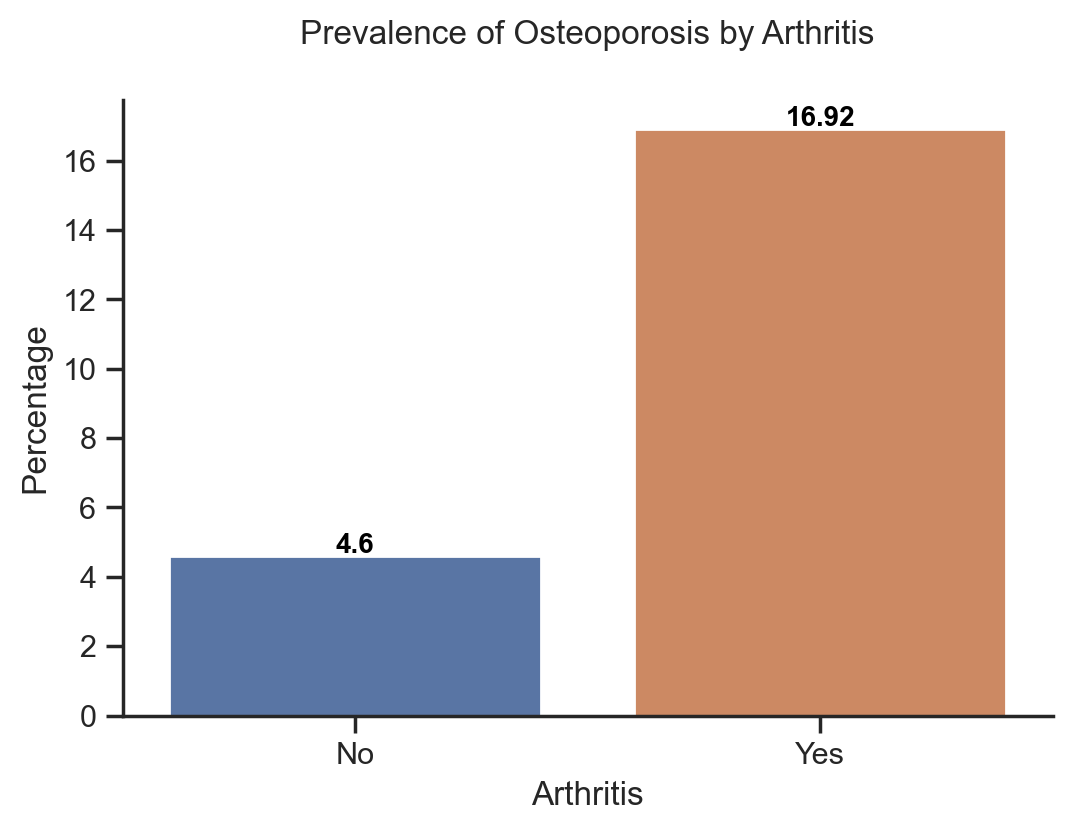

In [53]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Arthritis',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Arthritis'
                  )
plt.show()

#### 7.9.1 Male vs. Female

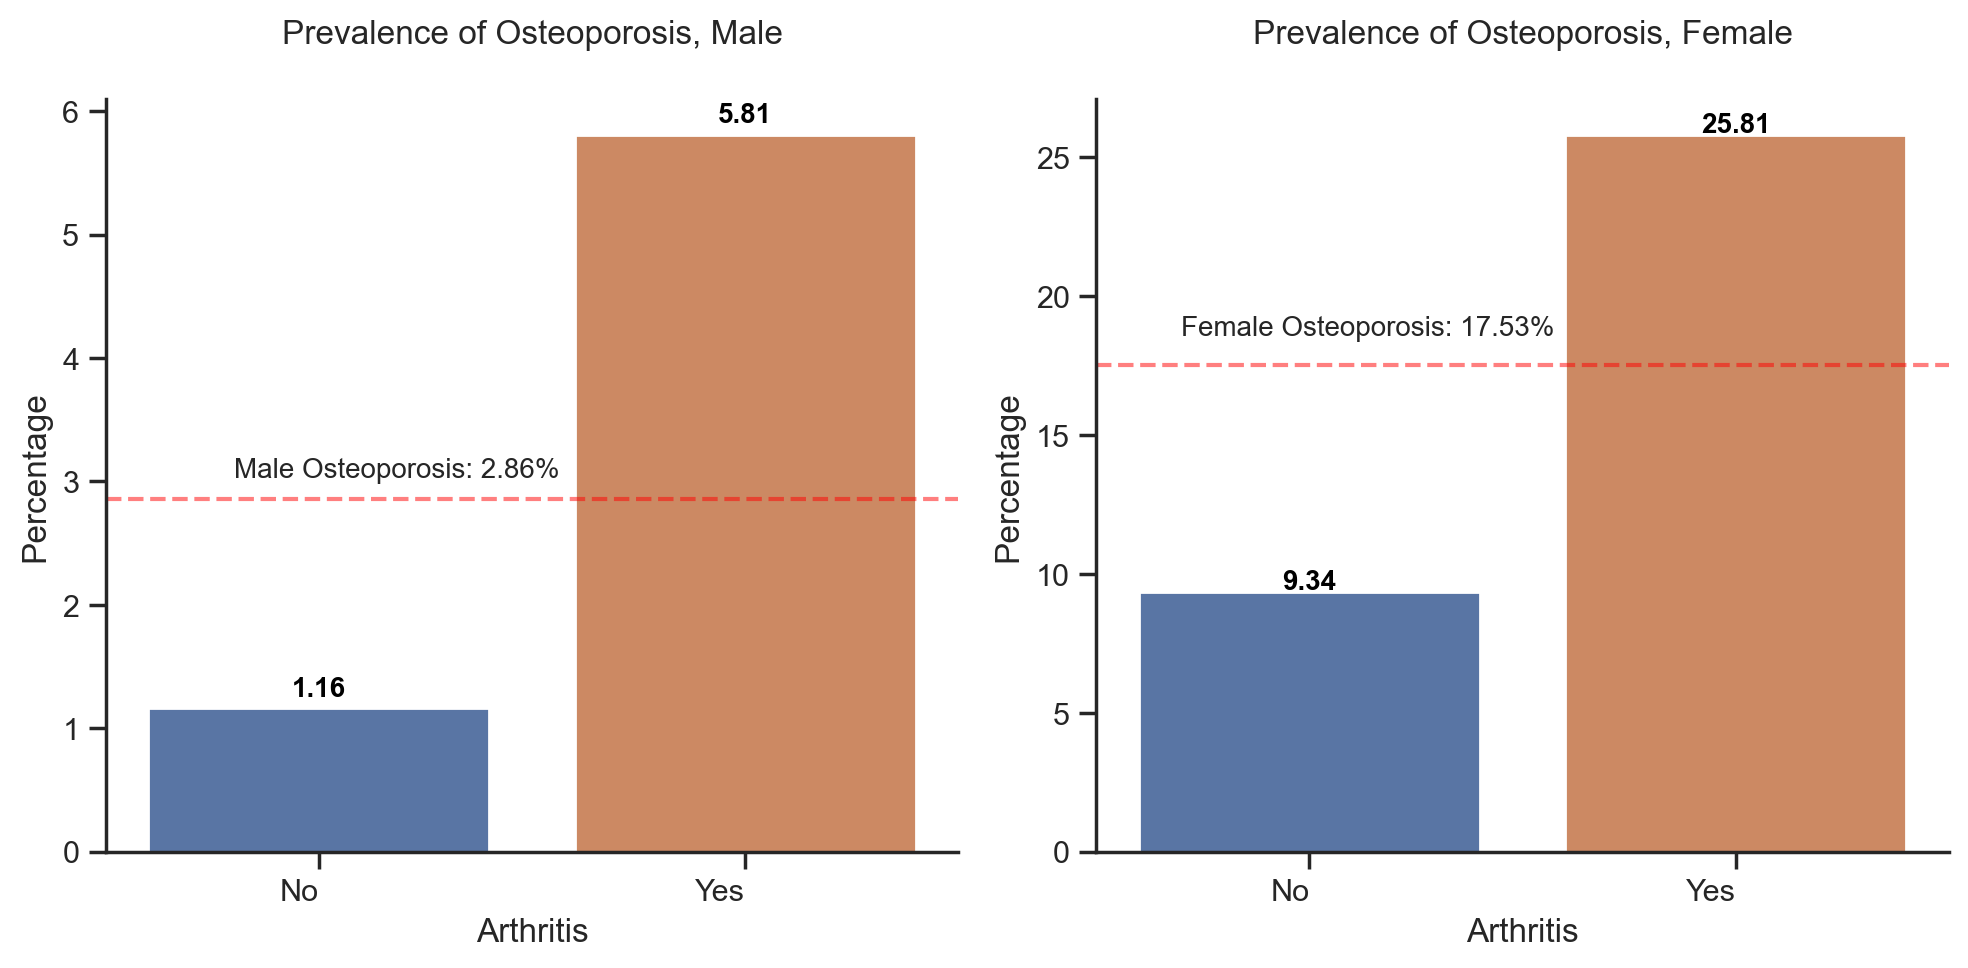

In [54]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Arthritis', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=-0.3,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

#### 7.9.2 Prevalence Ratio for Male (95% CI)

In [55]:
# with arthritis vs.no arthritis for male
df_grouped_m = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Arthritis', 
                            target_col='Osteoporosis')
pr_arth_male = get_prevalence_ratios(df_grouped_m, reference_group='No')
pr_arth_male

Predictor           PR (95% CI) Statistically Significant
0        No                   ref                          
1       Yes  5.005 (3.193, 7.847)                       Yes

#### 7.9.3 Prevalence Ratio for Female (95% CI)

In [56]:
# with arthritis vs.no arthritis for male
df_grouped_f = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Arthritis', 
                            target_col='Osteoporosis')
pr_arth_female = get_prevalence_ratios(df_grouped_f, reference_group='No')
pr_arth_female

Predictor           PR (95% CI) Statistically Significant
0        No                   ref                          
1       Yes  2.764 (2.318, 3.297)                       Yes

In summary, for both men and women, people with arthritis had higher risk of osteoporosis when compared to those without arthritis.

### 7.10 By Liver Condition

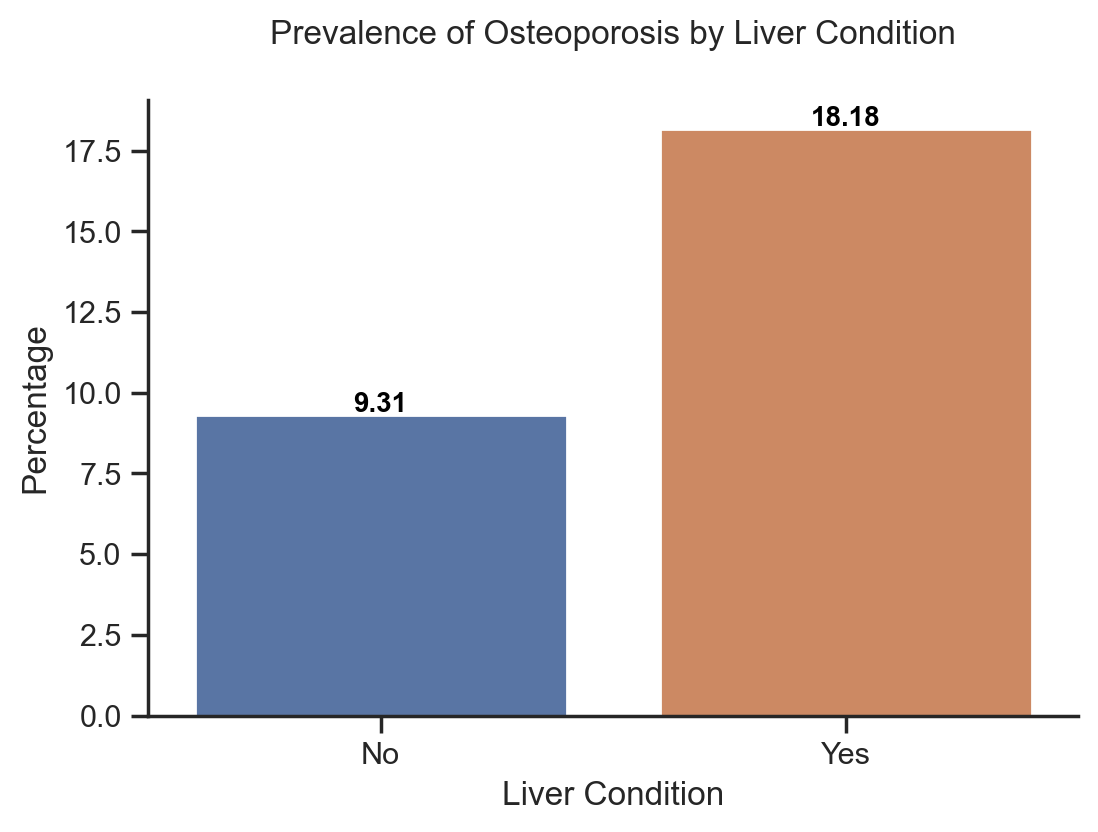

In [57]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Liver Condition',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Liver Condition'
                  )
plt.show()

#### 7.10.1 Male vs. Female

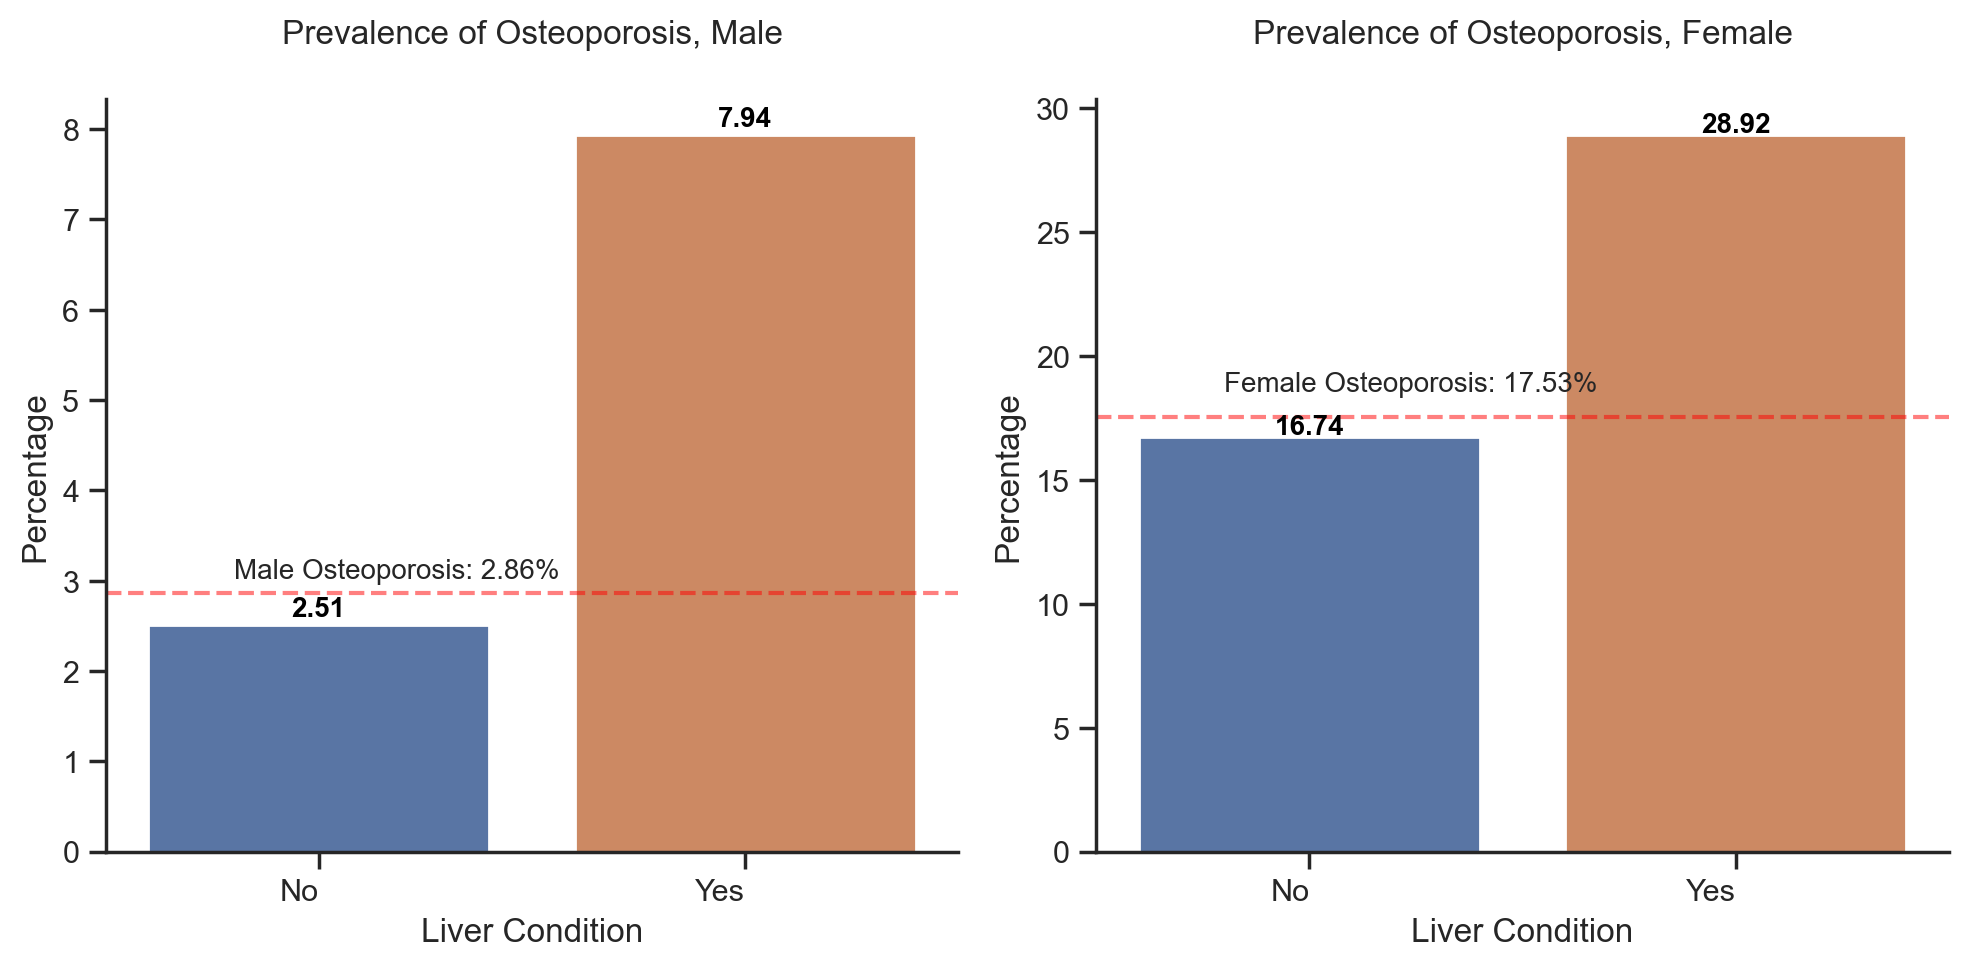

In [58]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Liver Condition', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=-0.2,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

#### 7.10.2 Prevalence Ratio for Male (95% CI)

In [59]:
# with liver condition vs. no liver condition for male
df_grouped_m = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Liver Condition', 
                            target_col='Osteoporosis')
pr_liver_male = get_prevalence_ratios(df_grouped_m, reference_group='No')
pr_liver_male

Predictor           PR (95% CI) Statistically Significant
0        No                   ref                          
1       Yes  3.159 (1.907, 5.233)                       Yes

#### 7.10.3 Prevalence Ratio for Female (95% CI)

In [60]:
# with liver condition vs. no liver condition for female
df_grouped_f = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Liver Condition', 
                            target_col='Osteoporosis')
pr_liver_female = get_prevalence_ratios(df_grouped_f, reference_group='No')
pr_liver_female

Predictor           PR (95% CI) Statistically Significant
0        No                   ref                          
1       Yes  1.728 (1.373, 2.175)                       Yes

In summary, for both men and women, those with liver condition had higher risk of osteoporosis when compared to those without.

## 8. Feature Engineering

### 8.1 One-Hot Encoding

Before applying any machine learning algorithm, we need to convert categorical variables into numbers.

In [61]:
cate_list = list(df_merged.select_dtypes(include=['category', 'object']).columns)
df_ohe = pd.get_dummies(df_merged, columns=cate_list, prefix_sep='_')
# drop columns end with '_No'
df_ohe = df_ohe[df_ohe.columns.drop(list(df_ohe.filter(regex='_No$')))]
# remove '_Yes', 'Gender_', and 'Race_' from column names
df_ohe.columns = df_ohe.columns.str.replace("_Yes|Gender_|Race_", "")
# drop redundant columns to reduce the impact of multicollinearity
df_ohe = df_ohe.drop(columns=['Male', 
                              'Other Race - Including Multi-Racial',
                             ])

df_ohe.head()

Age   BMI  Sleep Hours  Female  Mexican American  Non-Hispanic Asian  \
0  69.0  26.7          7.0       0                 0                   0   
1  54.0  28.6          9.0       0                 0                   0   
2  72.0  28.9          8.0       0                 0                   0   
3  73.0  19.7          9.0       1                 0                   0   
4  56.0  41.7          5.0       0                 1                   0   

   Non-Hispanic Black  Non-Hispanic White  Other Hispanic  Smoking  \
0                   1                   0               0        1   
1                   0                   1               0        1   
2                   0                   1               0        1   
3                   0                   1               0        0   
4                   0                   0               0        1   

   Heavy Drinking  Arthritis  Liver Condition  Osteoporosis  
0               1          1                0             0  
1               1          0                0             0  
2               0          0                0             1  
3               0          1                0             0  
4               0          1                0             0

### 8.2 Correlation Matrix

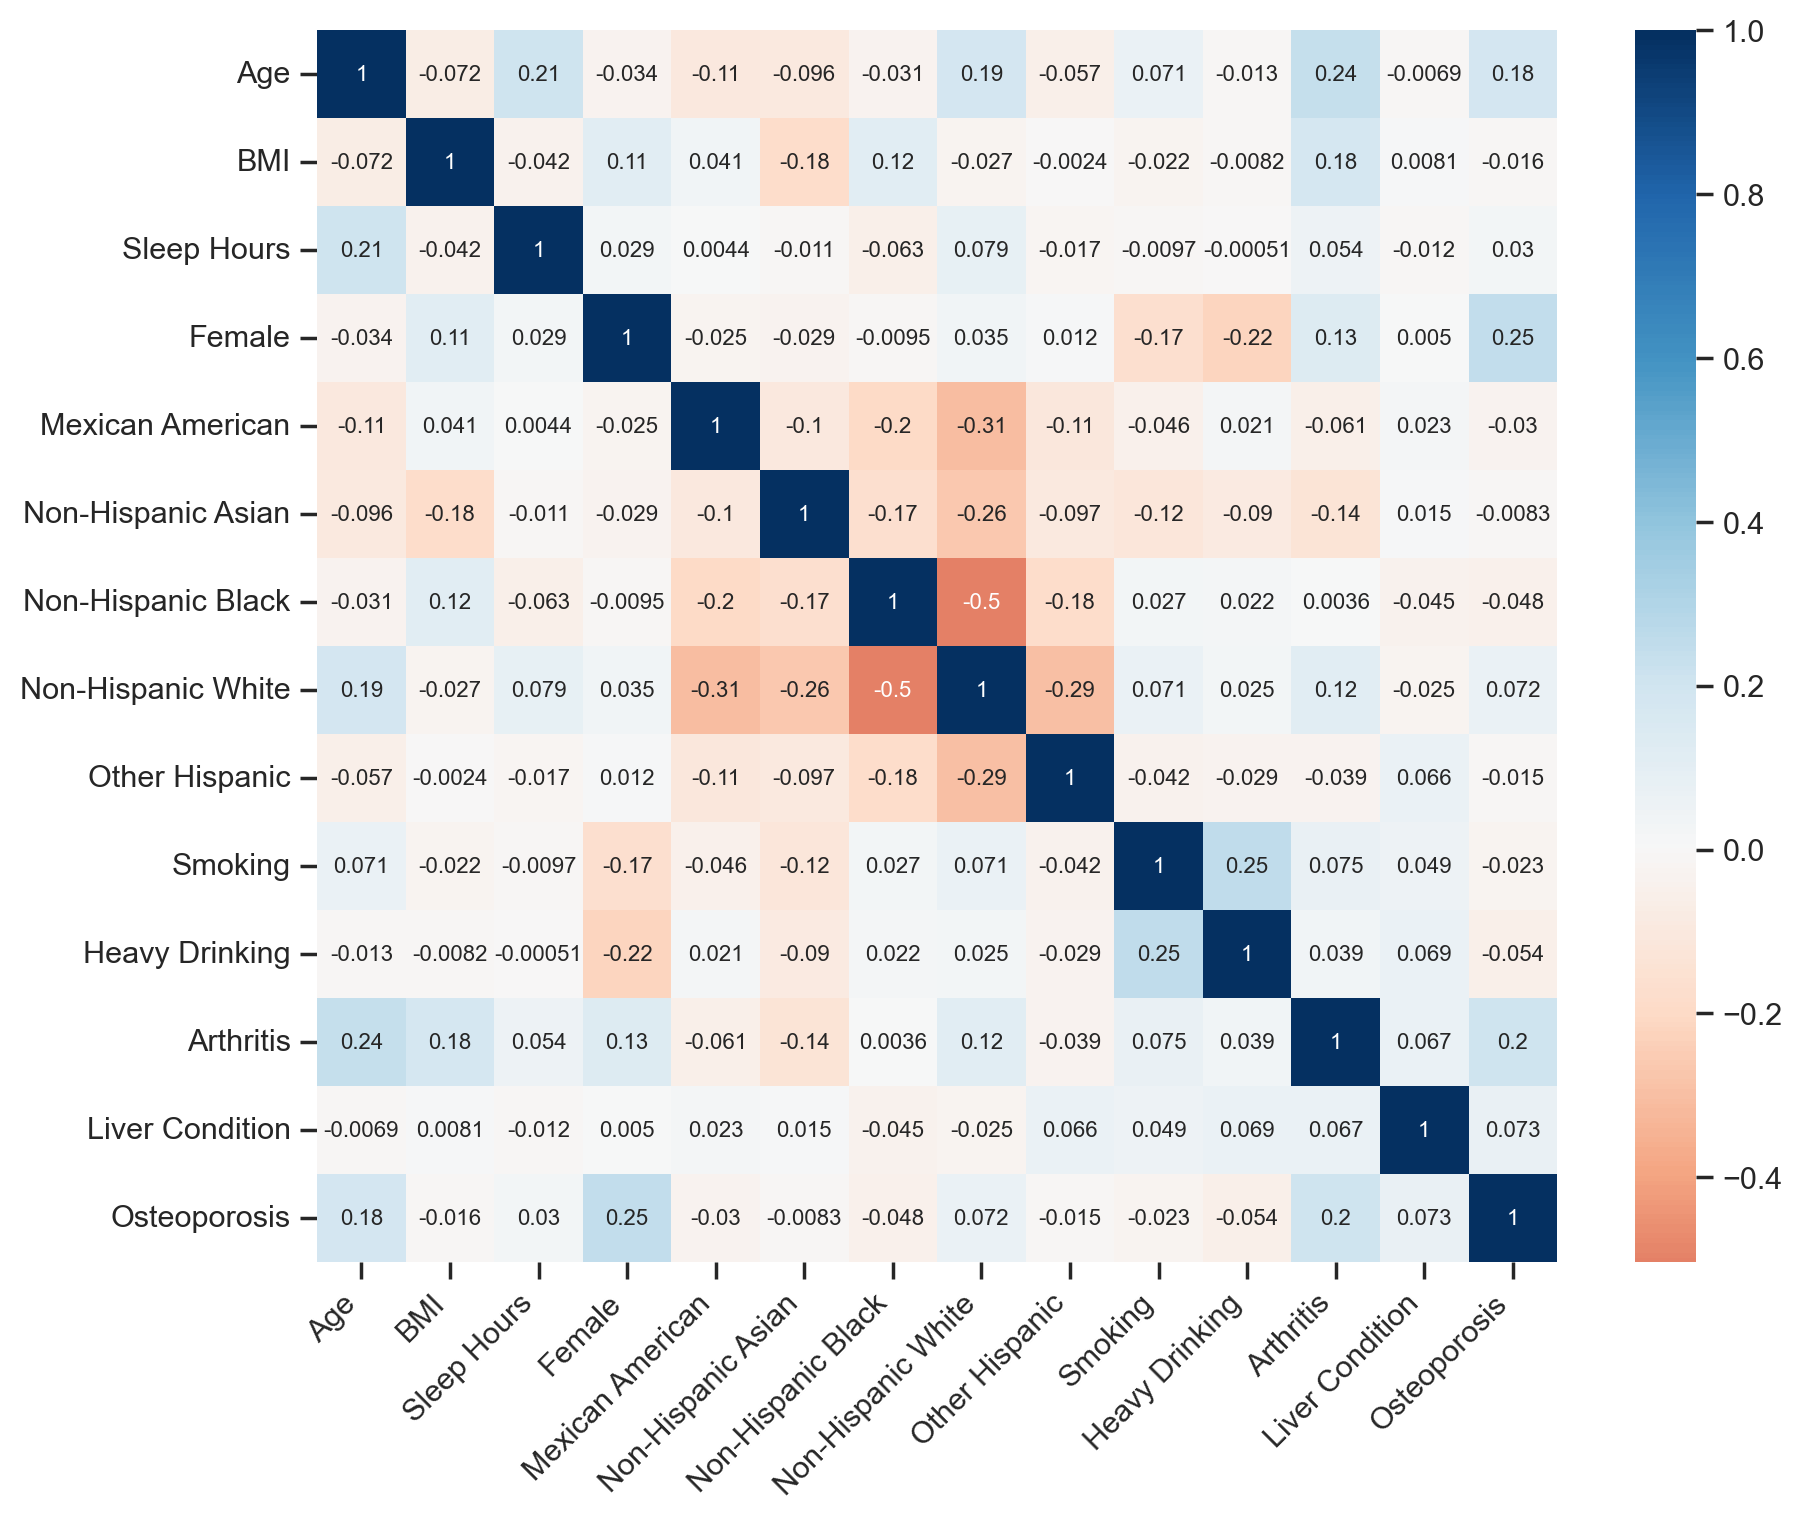

In [62]:
plt.figure(figsize=(10, 8))
chart = sns.heatmap(data=df_ohe.corr(), annot=True, annot_kws={"fontsize":8}, center=0, cmap="RdBu")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

According to the heatmap, "Age", "Female", and "Arthritis" might be weakly associated with osteoporosis, which in line with what we've observed in EDA.

## 9. Prepare Training and Testing Dataset

### 9.1 Addressing Imbalanced Data

We've known the dataset is imbalanced (with Osteoporosis: 9.9%). The problem of imbalanced data is that most machine learning might ignore the minority class and get poor performance on it. 
There are multiple options for addressing imbalanced data (refer [wiki](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)):
- **Undersampling**: such as Random undersampling, Cluster, Tomek links, EditedNearestNeighbours (ENN)
- **Oversampling**: such as Random oversampling, Adaptive Synthetic Sampling Approach (ADASYN), Synthetic Minority Oversampling (SMOTE)
- **Combination of undersampling and oversampling**: such as SMOTETomek (SMOTE plus TomekLinks)
, SMOTEENN (SMOTE plus ENN)

The major drawback of undersampling is that it can discard potentially useful data, which could be important for the induction process (refer [Class Imbalance Ensemble Learning Based on the Margin Theory](https://www.mdpi.com/2076-3417/8/5/815)). Therefore we're not going to use any undersampling.

Oversampling does not cause any loss of information, and in some cases, may perform better than undersampling. But oversampling often involves duplicating a small number of events, which leads to overfitting. To balance these concerns, some scenarios may require a combination of the two to obtain the most realistic dataset and accurate results.

Let's compare 2 oversampling and 1 combination techniques: [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html?highlight=adasyn), [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html) by one of the most popular algorithm, logistic regression, to decide the sampling technique for this project. 

**Original**

In [63]:
# split X, y
X = df_ohe.copy()
y = X.pop('Osteoporosis')

# standardization
(
    X_train,
    X_test,
    y_train,
    y_test,
    X_train_ss,
    X_test_ss,
) = train_test_standardscaler(
    X, y, test_size=0.2, random_state=42
)

**ADASYN**

In [64]:
ada = ADASYN(random_state=42)
X_train_ss_ada, y_train_ada = ada.fit_resample(X_train_ss, y_train)

**SMOTE**

In [65]:
smote = SMOTE(random_state=42)
X_train_ss_smote, y_train_smote = smote.fit_resample(X_train_ss, y_train)

**SMOTETomek**

In [66]:
smtomek = SMOTETomek(random_state=42)
X_train_ss_smtomek, y_train_smtomek = smtomek.fit_resample(X_train_ss, y_train)

In [67]:
# double check the corresponding dimensions
print('====== Original ========\n')
print(f'the shape of X_train is: {X_train_ss.shape}')
print(f'the shape of y_train is: {y_train.shape}')
print(f'the shape of X_test is: {X_test_ss.shape}')
print(f'the shape of y_test is: {y_test.shape}')

print('\n====== With ADASYN ========\n')
print(f'the shape of X_train is: {X_train_ss_ada.shape}')
print(f'the shape of y_train is: {y_train_ada.shape}')
print("y_train before ADASYN: ", Counter(y_train))
print("y_train after ADASYN: ", Counter(y_train_ada))

print('\n====== With SMOTE ========\n')
print(f'the shape of X_train is: {X_train_ss_smote.shape}')
print(f'the shape of y_train is: {y_train_smote.shape}')
print("y_train before SMOTE: ", Counter(y_train))
print("y_train after SMOTE: ", Counter(y_train_smote))


print('\n====== With SMOTETomek ========\n')
print(f'the shape of X_train is: {X_train_ss_smtomek.shape}')
print(f'the shape of y_train is: {y_train_smtomek.shape}')
print("y_train before SMOTETomek: ", Counter(y_train))
print("y_train after SMOTETomek: ", Counter(y_train_smtomek))

====== Original ========

the shape of X_train is: (5207, 13)
the shape of y_train is: (5207,)
the shape of X_test is: (1302, 13)
the shape of y_test is: (1302,)

====== With ADASYN ========

the shape of X_train is: (9445, 13)
the shape of y_train is: (9445,)
y_train before ADASYN:  Counter({0: 4693, 1: 514})
y_train after ADASYN:  Counter({1: 4752, 0: 4693})

====== With SMOTE ========

the shape of X_train is: (9386, 13)
the shape of y_train is: (9386,)
y_train before SMOTE:  Counter({0: 4693, 1: 514})
y_train after SMOTE:  Counter({0: 4693, 1: 4693})

====== With SMOTETomek ========

the shape of X_train is: (9150, 13)
the shape of y_train is: (9150,)
y_train before SMOTETomek:  Counter({0: 4693, 1: 514})
y_train after SMOTETomek:  Counter({0: 4575, 1: 4575})


Next, let's compare their performance with one of the most popular algorithms, logistic regression.

### 9.2 Comparison of Sampling Techniques

#### 9.2.1 Training and Prediction

In [68]:
# ==== Original =====
lr_model_no = LogisticRegression(random_state=42)
# train the model
lr_model_no.fit(X_train_ss, y_train)
# predict test result
y_test_predict_no = lr_model_no.predict(X_test_ss)

# ==== ADASYN =====
lr_model_ada = LogisticRegression(random_state=42)
lr_model_ada.fit(X_train_ss_ada, y_train_ada)
y_test_predict_ada = lr_model_ada.predict(X_test_ss)

# ==== SMOTE =====
lr_model_smote = LogisticRegression(random_state=42)
lr_model_smote.fit(X_train_ss_smote, y_train_smote)
y_test_predict_smote = lr_model_smote.predict(X_test_ss)

# ==== SMOTETomek =====
lr_model_smtomek = LogisticRegression(random_state=42)
lr_model_smtomek.fit(X_train_ss_smtomek, y_train_smtomek)
y_test_predict_smtomek = lr_model_smtomek.predict(X_test_ss)

#### 9.2.2 Confusion Matrix

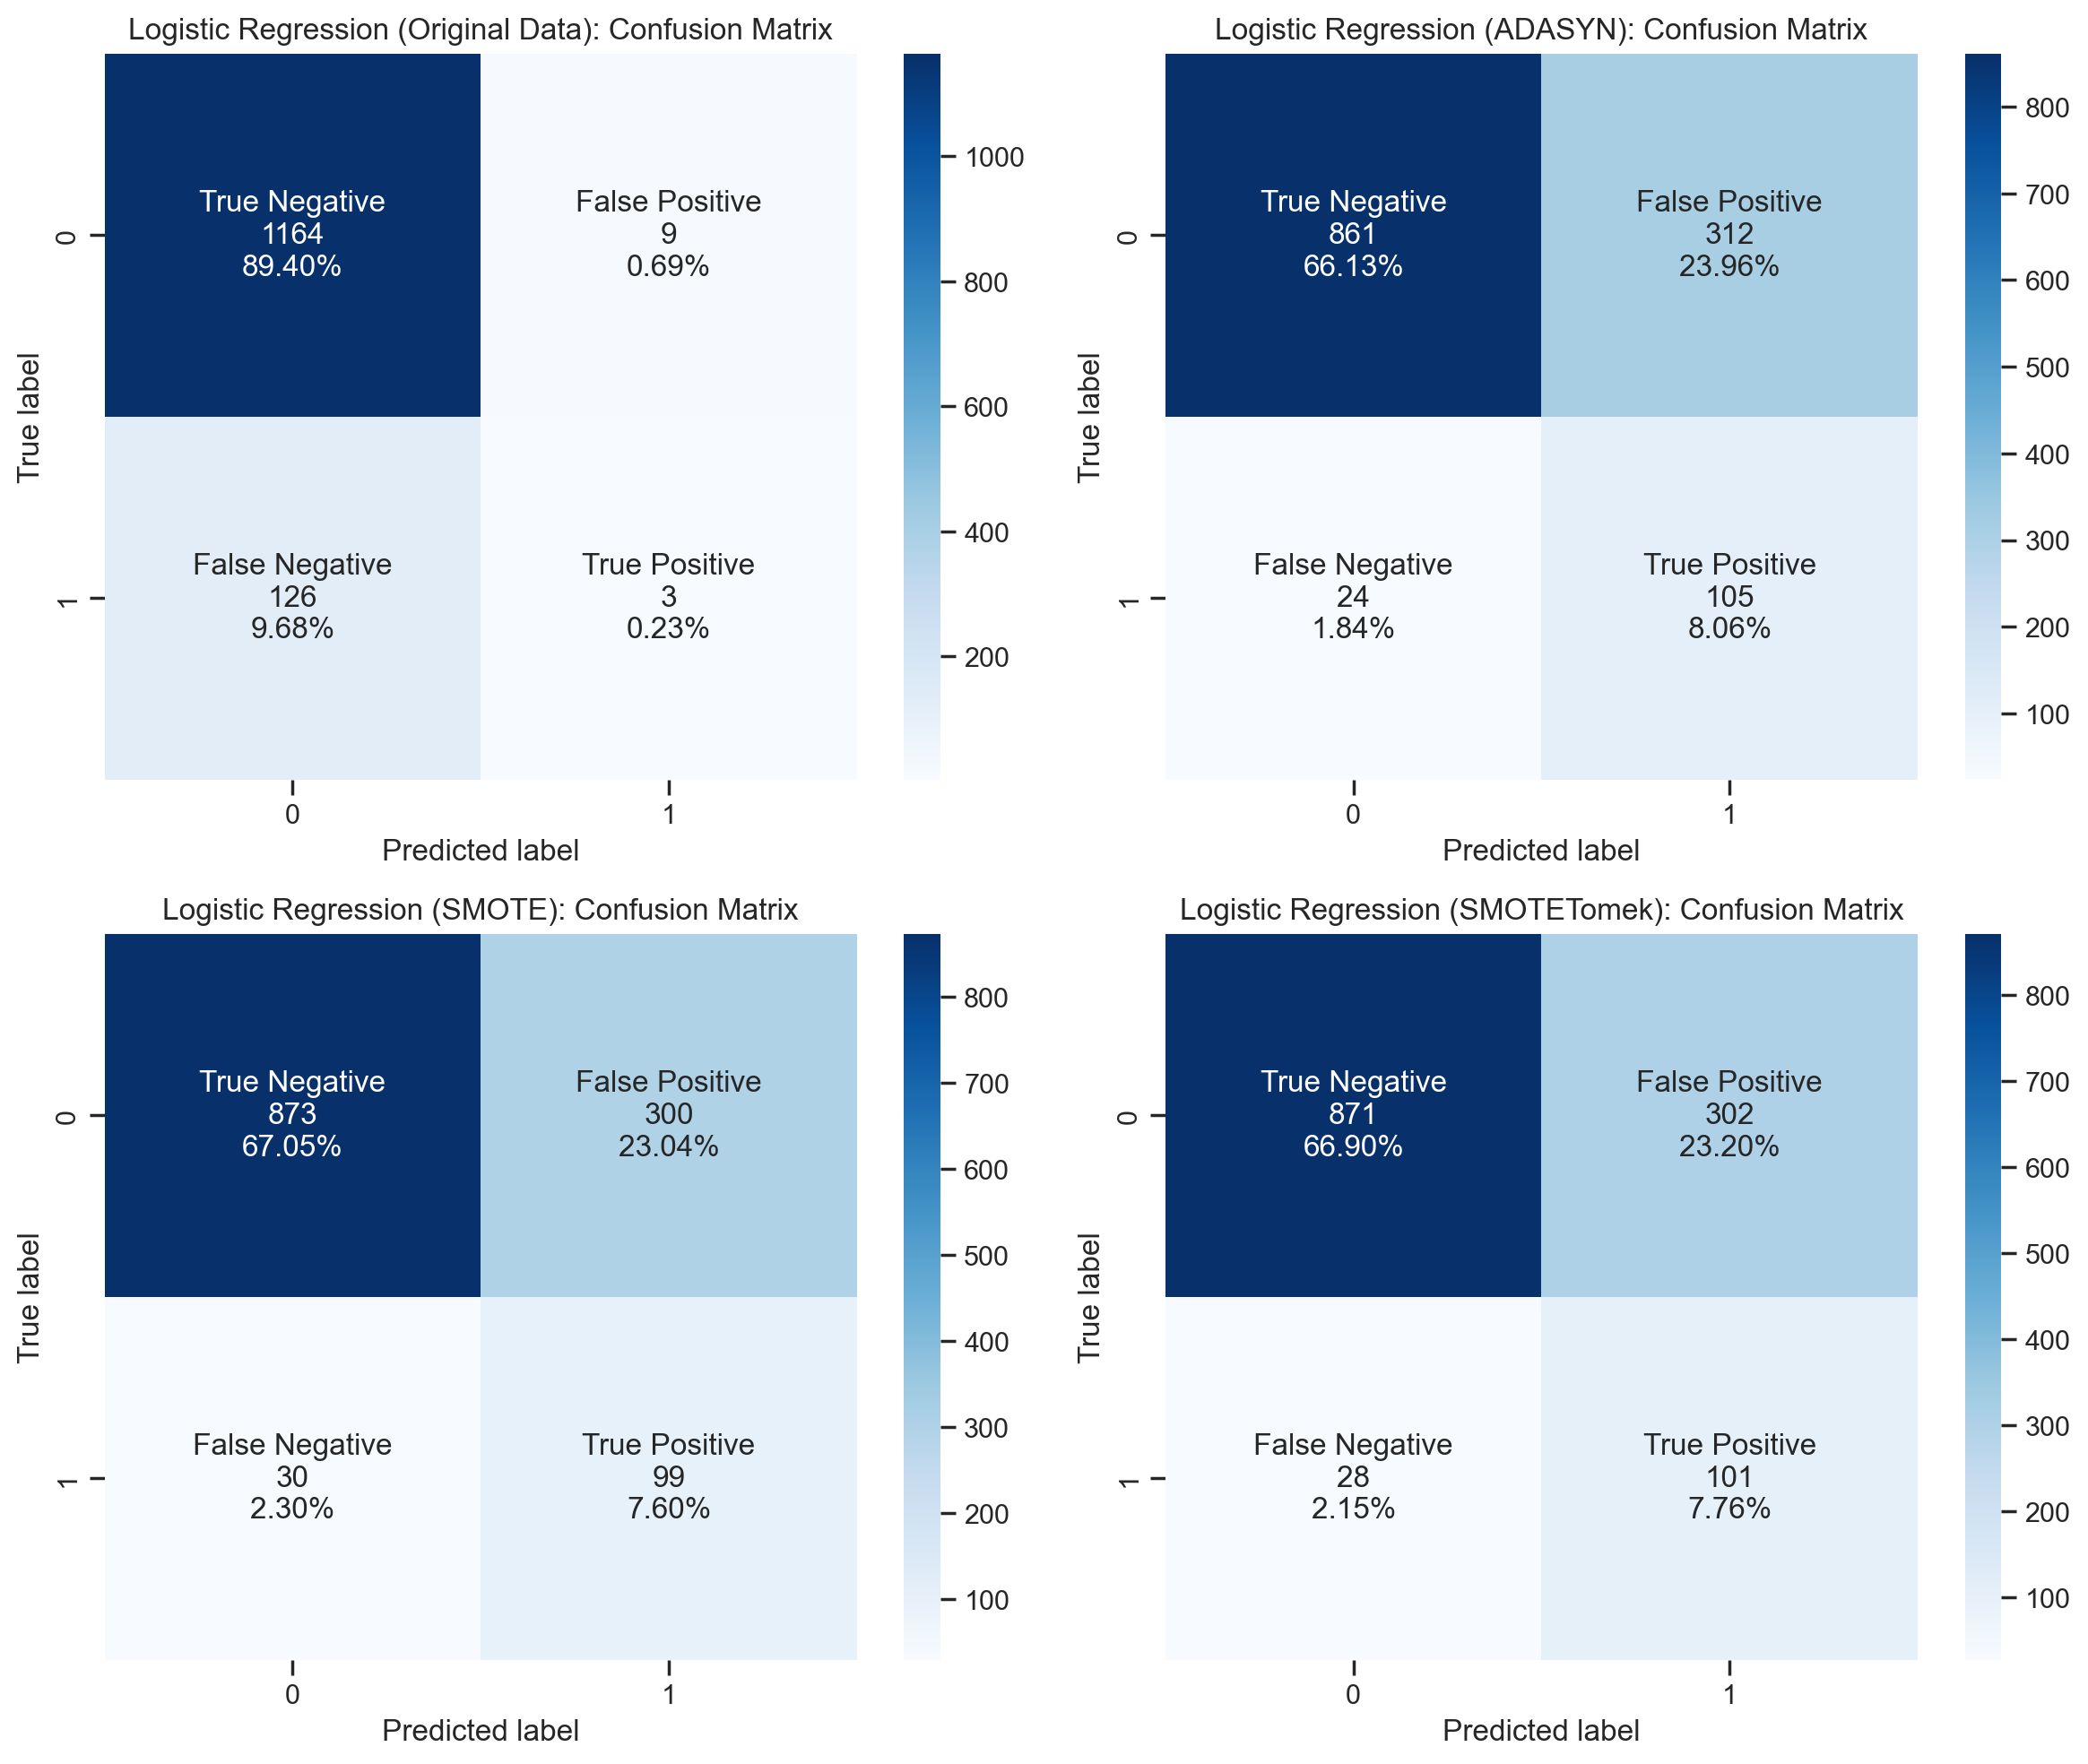

In [69]:
# Original data: confusion matrix
lr_cf_matrix_no = confusion_matrix(y_test, y_test_predict_no)
# ADASYN: confusion matrix
lr_cf_matrix_ada = confusion_matrix(y_test, y_test_predict_ada)
# SMOTE: confusion matrix
lr_cf_matrix_smote = confusion_matrix(y_test, y_test_predict_smote)
# SMOTETomek: confusion matrix
lr_cf_matrix_smtomek = confusion_matrix(y_test, y_test_predict_smtomek)

plt.figure(figsize=(12, 10))
plt.subplot(221)
plot_cf_matrix(lr_cf_matrix_no, model_name="Logistic Regression (Original Data)")
plt.subplot(222)
plot_cf_matrix(lr_cf_matrix_ada, model_name="Logistic Regression (ADASYN)")
plt.subplot(223)
plot_cf_matrix(lr_cf_matrix_smote, model_name="Logistic Regression (SMOTE)")
plt.subplot(224)
plot_cf_matrix(lr_cf_matrix_smtomek, model_name="Logistic Regression (SMOTETomek)")
plt.tight_layout()

#### 9.2.3 AUC

No Skill: ROC AUC=0.5
Logistic Regression (Original Data): ROC AUC=0.825
Logistic Regression (ADASYN): ROC AUC=0.827
Logistic Regression (SMOTE): ROC AUC=0.826
Logistic Regression (SMOTETomek): ROC AUC=0.826


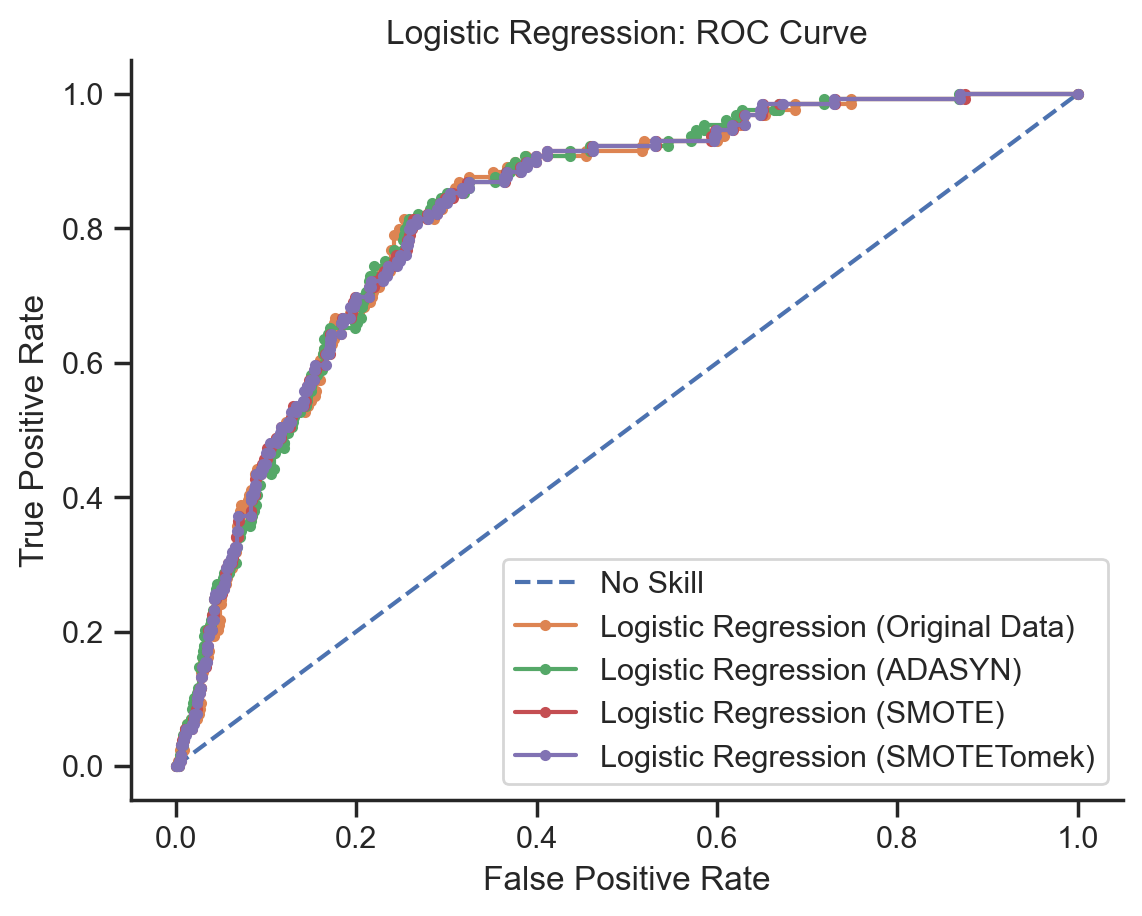

In [70]:
y_test_predict_probs_no = get_predict_proba(lr_model_no, X_test_ss)
lr_auc_no, lr_roc_plot_no = plot_auc(y_test, 
                                     y_test_predict_probs_no, 
                                     model_name="Logistic Regression (Original Data)")
y_test_predict_probs_ada = get_predict_proba(lr_model_ada, X_test_ss)
lr_auc_ada, lr_roc_plot_ada = plot_auc(y_test, 
                               y_test_predict_probs_ada, 
                               display_no_skill=False,
                               model_name="Logistic Regression (ADASYN)",
                               title="Logistic Regression: ROC Curve")
y_test_predict_probs_smote = get_predict_proba(lr_model_smote, X_test_ss)
lr_auc_smote, lr_roc_plot_smote = plot_auc(y_test, 
                               y_test_predict_probs_smote, 
                               display_no_skill=False,
                               model_name="Logistic Regression (SMOTE)",
                               title="Logistic Regression: ROC Curve")
y_test_predict_probs_smtomek = get_predict_proba(lr_model_smtomek, X_test_ss)
lr_auc_smtomek, lr_roc_plot_smtomek = plot_auc(y_test, 
                               y_test_predict_probs_smtomek, 
                               display_no_skill=False,
                               model_name="Logistic Regression (SMOTETomek)",
                               title="Logistic Regression: ROC Curve")


Their ROC curves are almost the same, we need to compare other metrics such as recall.

#### 9.2.4 Performance Metrics

In [71]:
# precision, accuracy, f1-score, and AUC
lr_model_scores_no = binary_classification_scores(lr_cf_matrix_no, 
                                                  auc=lr_auc_no, 
                                                  model_name='Logistic Regression (Original Data)')
lr_model_scores_ada = binary_classification_scores(lr_cf_matrix_ada, 
                                               auc=lr_auc_ada,
                                               model_name='Logistic Regression (ADASYN)')
lr_model_scores_smote = binary_classification_scores(lr_cf_matrix_smote, 
                                               auc=lr_auc_smote,
                                               model_name='Logistic Regression (SMOTE)')
lr_model_scores_smtomek = binary_classification_scores(lr_cf_matrix_smtomek, 
                                                  auc=lr_auc_smtomek, 
                                                  model_name='Logistic Regression (SMOTETomek)')

lr_scores = pd.concat([lr_model_scores_no, 
                       lr_model_scores_ada,
                       lr_model_scores_smote, 
                       lr_model_scores_smtomek])
lr_scores.sort_values(by=['F1 Score', 'Recall'], ascending=False)

Accuracy  Precision  Recall  F1 Score  \
Model                                                                        
Logistic Regression (ADASYN)            0.742      0.252   0.814     0.385   
Logistic Regression (SMOTETomek)        0.747      0.251   0.783     0.380   
Logistic Regression (SMOTE)             0.747      0.248   0.767     0.375   
Logistic Regression (Original Data)     0.896      0.250   0.023     0.043   

                                       AUC  
Model                                       
Logistic Regression (ADASYN)         0.827  
Logistic Regression (SMOTETomek)     0.826  
Logistic Regression (SMOTE)          0.826  
Logistic Regression (Original Data)  0.825

Compared to the original data, we can see a significant increase in recall and F1-score with any sampling technique, despite a decrease in precision and accuracy. Given the importance of predicting the presence of osteoporosis, the use of oversampling remains beneficial.

Taking F1 score and accuracy into consideration, **ADASYN** performs the best. Let's use it as the method for handling imbalanced data in this study.

Next, let's compare several common classification models and find the optimal one.

## 10. Support Vector Machine
### 10.1 Training and Prediction

In [73]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_ss_ada, y_train_ada)
y_test_predict_svm = svm_model.predict(X_test_ss)

### 10.2 Model Evaluation

**Confusion Matrix**

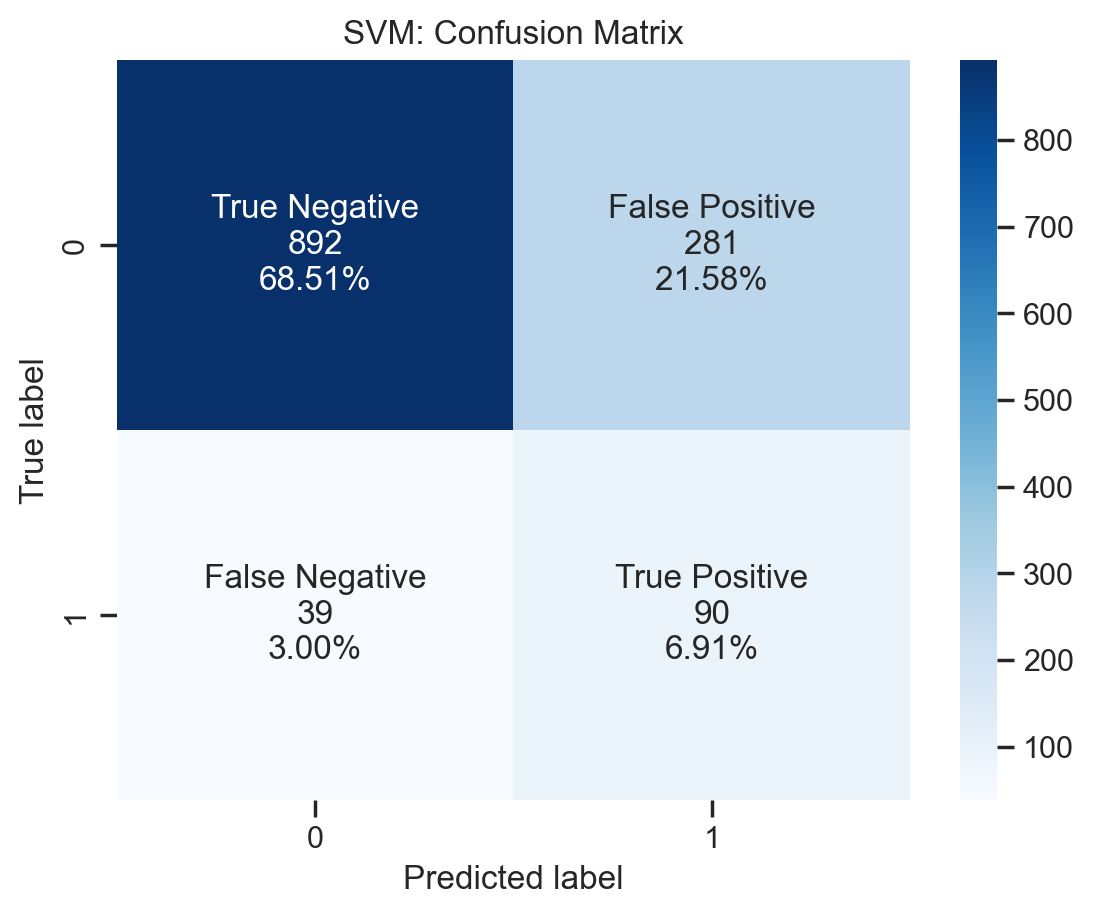

In [74]:
svm_cf_matrix = confusion_matrix(y_test, y_test_predict_svm)
plot_cf_matrix(svm_cf_matrix, model_name="SVM")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
SVM: ROC AUC=0.781


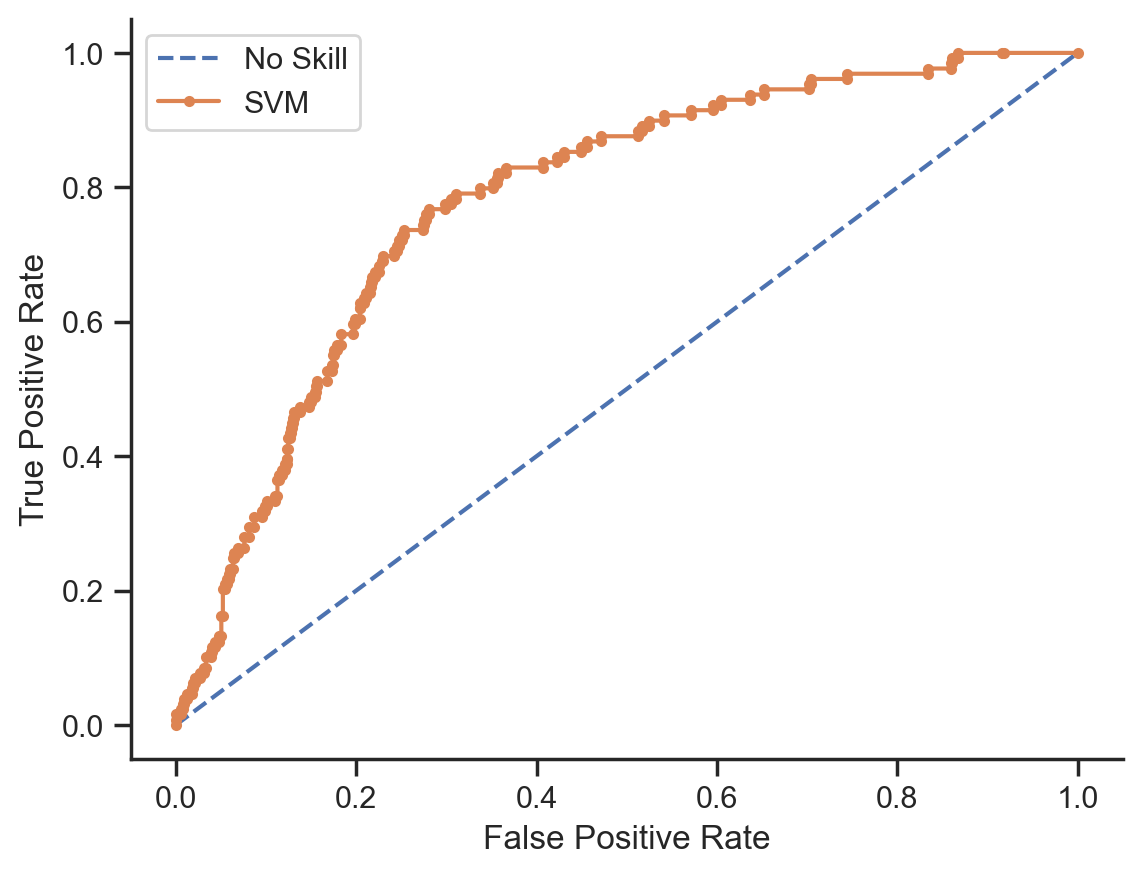

In [75]:
y_test_predict_probs_svm = get_predict_proba(svm_model, X_test_ss)
svm_auc, svm_roc_plot = plot_auc(y_test, y_test_predict_probs_svm, model_name="SVM")

**Performance Metrics**

In [76]:
# precision, accuracy, f1-score, and AUC
svm_model_scores = binary_classification_scores(svm_cf_matrix, 
                                                auc=svm_auc, 
                                                model_name='SVM')
svm_model_scores

Accuracy  Precision  Recall  F1 Score    AUC
Model                                              
SVM       0.754      0.243   0.698      0.36  0.781

## 11. Random Forest

### 11.1 Training and Prediction

In [77]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ss_ada, y_train_ada)
y_test_predict_rf = rf_model.predict(X_test_ss)

### 11.2 Model Evaluation

**Confusion Matrix**

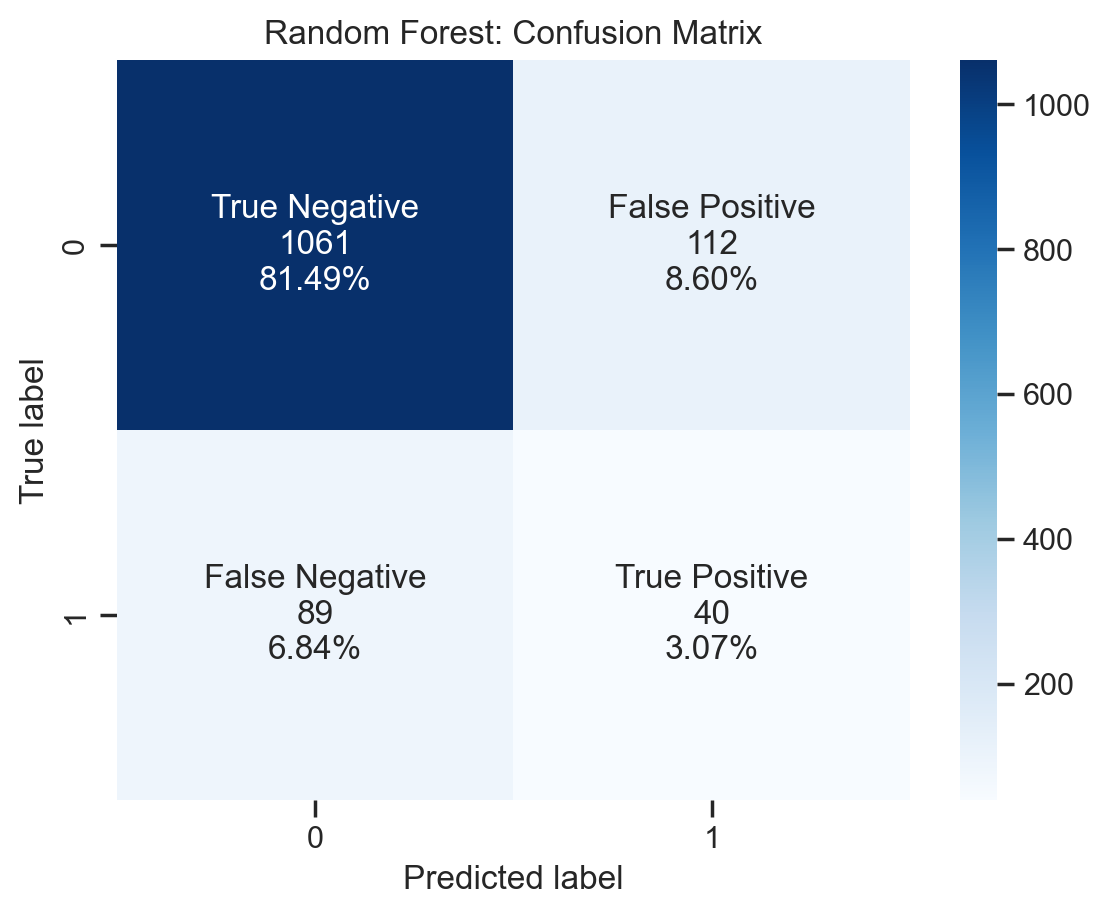

In [78]:
rf_cf_matrix = confusion_matrix(y_test, y_test_predict_rf)
plot_cf_matrix(rf_cf_matrix, model_name="Random Forest")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Random Forest: ROC AUC=0.769


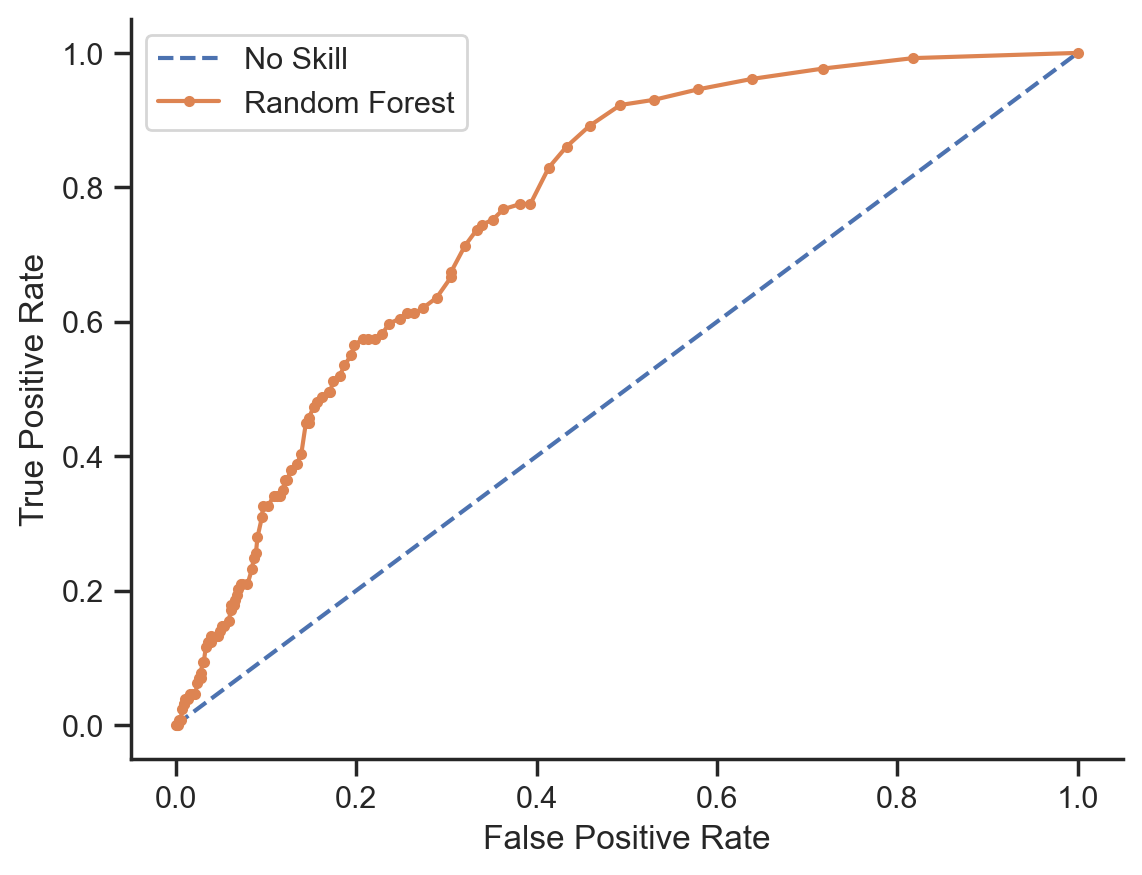

In [79]:
y_test_predict_probs_rf = get_predict_proba(rf_model, X_test_ss)
rf_auc, rf_roc_plot = plot_auc(y_test, y_test_predict_probs_rf, model_name="Random Forest")

**Performance Metrics**

In [80]:
# precision, accuracy, f1-score, and AUC
rf_model_scores = binary_classification_scores(rf_cf_matrix,
                                               auc=rf_auc,
                                               model_name='Random Forest')
rf_model_scores

Accuracy  Precision  Recall  F1 Score    AUC
Model                                                      
Random Forest     0.846      0.263    0.31     0.285  0.769

## 12. Neural Networks

Let's first try a shallow neural network with only one hidden layer. According to book [*From Introduction to Neural Networks for Java (second edition) - Chapter 5*](https://books.google.it/books?id=Swlcw7M4uD8C) by Jeff Heaton :
> There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
> 1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
> 2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
> 3. The number of hidden neurons should be less than twice the size of the input layer. 

To start from a simple neural networks model, let's set 1 hidden layer with 6 (rule 1, between the size of the input layer 13 and the size of the output layer 1)

### 12.1 Train the Model

In [88]:
# set seed
np.random.seed(42)
tf.random.set_seed(42)

nn_model = Sequential(
    [      
        # the input, layer 0
        tf.keras.Input(shape=(13,)),
        # hidden layer
        Dense(units=6, name="l1", activation="relu"),
        # the output layer, use linear activation here and set from_logits=True in
        # BinaryCrossentropy to get numerically accurate results 
        Dense(units=1, name="l2", activation="linear")
    ], name = "nn_model" 
)
nn_model.summary()

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 6)                 84        
                                                                 
 l2 (Dense)                  (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [89]:
nn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

history = nn_model.fit(X_train_ss_ada, 
                       y_train_ada, 
                       epochs=100, 
                       batch_size=20, 
                       validation_split=0.2)

Epoch 1/100
378/378 [==============================] - 1s 2ms/step - loss: 0.7666 - val_loss: 0.5549
Epoch 2/100
378/378 [==============================] - 1s 2ms/step - loss: 0.7187 - val_loss: 0.5839
Epoch 3/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6805 - val_loss: 0.6097
Epoch 4/100
378/378 [==============================] - 1s 1ms/step - loss: 0.6498 - val_loss: 0.6319
Epoch 5/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6251 - val_loss: 0.6485
Epoch 6/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6048 - val_loss: 0.6613
Epoch 7/100
378/378 [==============================] - 1s 2ms/step - loss: 0.5881 - val_loss: 0.6701
Epoch 8/100
378/378 [==============================] - 1s 2ms/step - loss: 0.5742 - val_loss: 0.6770
Epoch 9/100
378/378 [==============================] - 1s 2ms/step - loss: 0.5626 - val_loss: 0.6828
Epoch 10/100
378/378 [==============================] - 1s 1ms/step - loss: 0.5528 - val_lo

378/378 [==============================] - 1s 2ms/step - loss: 0.4656 - val_loss: 0.6697
Epoch 82/100
378/378 [==============================] - 1s 2ms/step - loss: 0.4655 - val_loss: 0.6702
Epoch 83/100
378/378 [==============================] - 1s 1ms/step - loss: 0.4653 - val_loss: 0.6709
Epoch 84/100
378/378 [==============================] - 1s 1ms/step - loss: 0.4652 - val_loss: 0.6708
Epoch 85/100
378/378 [==============================] - 1s 2ms/step - loss: 0.4650 - val_loss: 0.6715
Epoch 86/100
378/378 [==============================] - 1s 2ms/step - loss: 0.4648 - val_loss: 0.6686
Epoch 87/100
378/378 [==============================] - 1s 2ms/step - loss: 0.4647 - val_loss: 0.6702
Epoch 88/100
378/378 [==============================] - 1s 1ms/step - loss: 0.4645 - val_loss: 0.6692
Epoch 89/100
378/378 [==============================] - 1s 1ms/step - loss: 0.4644 - val_loss: 0.6693
Epoch 90/100
378/378 [==============================] - 1s 2ms/step - loss: 0.4642 - val_loss: 

### 12.2 Loss Curves

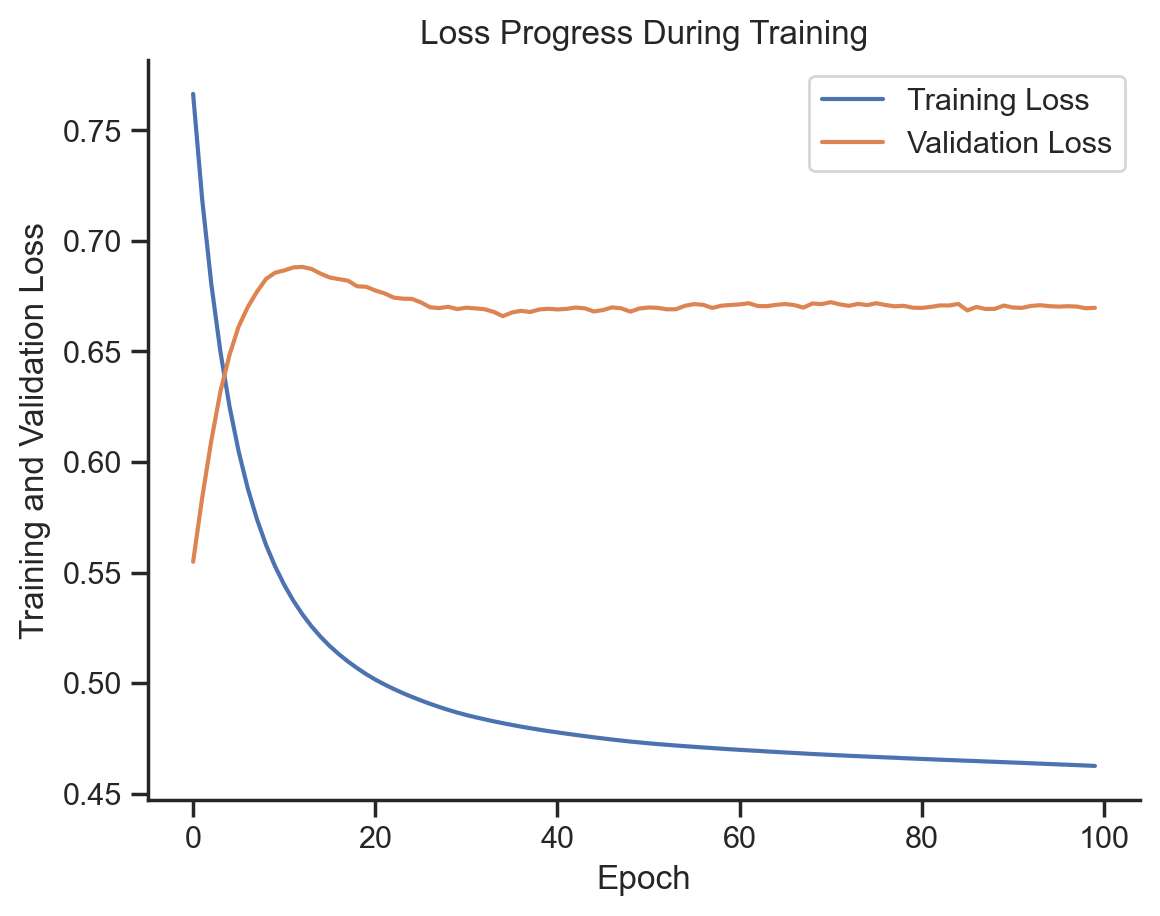

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The neural networks is valid because the two loss curves are relatively stable in the end.

### 12.3 Model Evaluation
**Confusion Matrix**

41/41 [==============================] - 0s 1ms/step


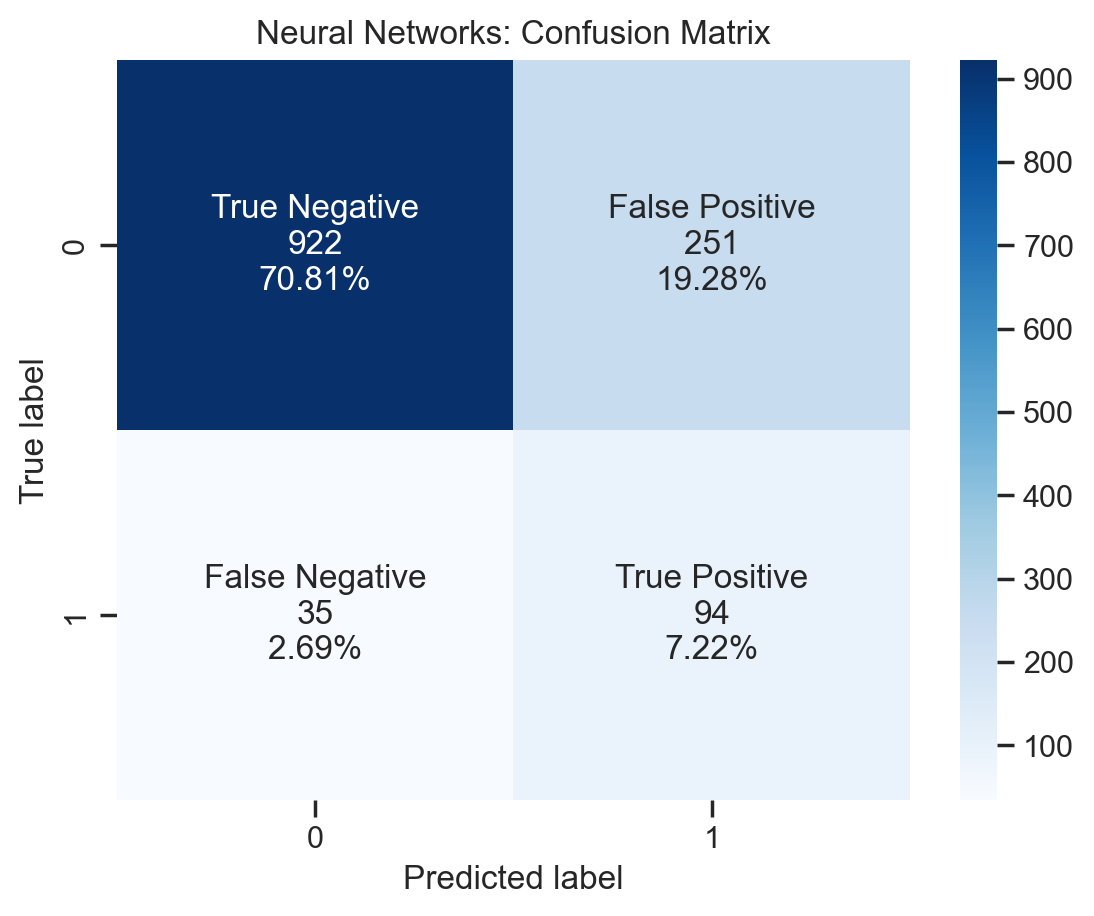

In [91]:
# prediction
y_predict_nn_logit = nn_model.predict(X_test_ss)
# after sigmoid we get the probabilies to be 1
y_predict_nn_prod = tf.nn.sigmoid(y_predict_nn_logit)
# the predicted label will be 1 only when the probability >= 0.5
y_predict_nn = tf.round(y_predict_nn_prod)

# confusion matrix
nn_cf_matrix = confusion_matrix(y_test, y_predict_nn)
plot_cf_matrix(nn_cf_matrix, 'Neural Networks')
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Neural Networks: ROC AUC=0.832


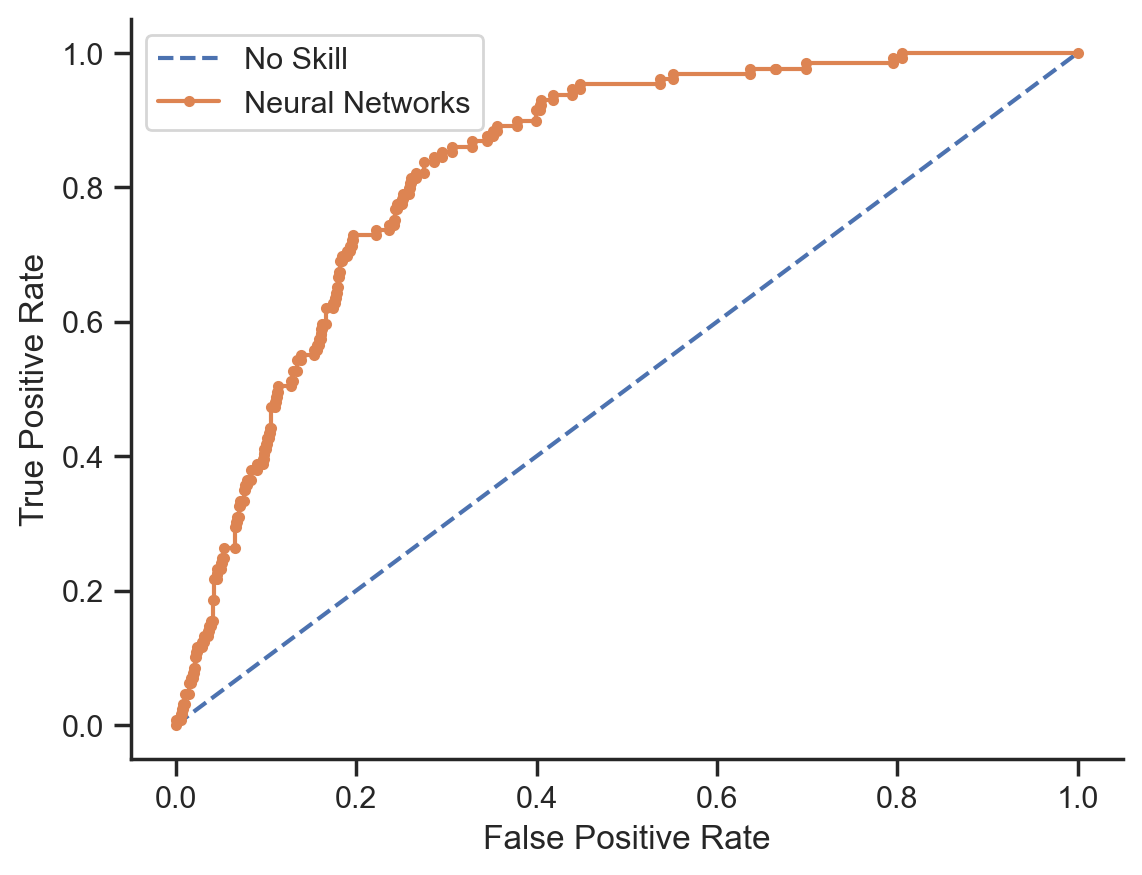

In [92]:
nn_auc, nn_roc_plot = plot_auc(y_test, y_predict_nn_prod, model_name="Neural Networks")

**Performance Metrics**

In [93]:
# precision, accuracy, f1-score, and AUC
nn_model_scores = binary_classification_scores(nn_cf_matrix, auc=nn_auc, 
                                               model_name='Neural Networks')
nn_model_scores

Accuracy  Precision  Recall  F1 Score    AUC
Model                                                        
Neural Networks      0.78      0.272   0.729     0.397  0.832

## 13. Model Comparison

Now we have performance metrics of 4 models, which one is the best?

**ROC Curve**

No Skill: ROC AUC=0.5
Logistic Regression: ROC AUC=0.827
SVM: ROC AUC=0.781
Random Forest: ROC AUC=0.769
Neural Networks: ROC AUC=0.832


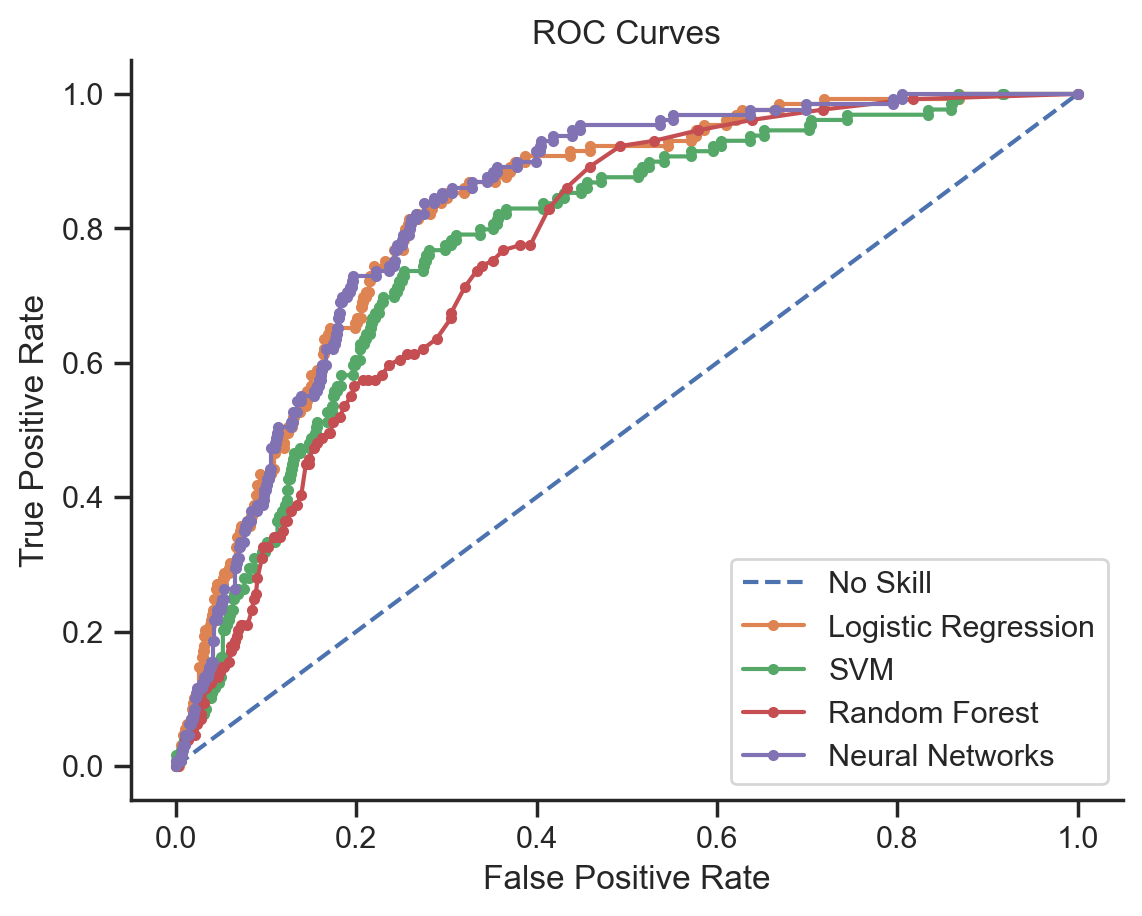

In [94]:
plot_auc(y_test, 
    y_test_predict_probs_ada, 
    model_name="Logistic Regression")
plot_auc(y_test, 
    y_test_predict_probs_svm, 
    display_no_skill=False,
    model_name="SVM")
plot_auc(y_test, 
    y_test_predict_probs_rf, 
    display_no_skill=False,
    model_name="Random Forest")
plot_auc(y_test, 
    y_predict_nn_prod, 
    display_no_skill=False,
    model_name="Neural Networks",
    title="ROC Curves")
plt.show()

**Performance Metrics**

In [95]:
# show performance metrics of all models
combined = pd.concat([lr_scores.loc[['Logistic Regression (ADASYN)']], 
                      svm_model_scores, nn_model_scores, rf_model_scores])
combined.sort_values(by=['F1 Score'], ascending=False)

Accuracy  Precision  Recall  F1 Score    AUC
Model                                                                     
Neural Networks                  0.780      0.272   0.729     0.397  0.832
Logistic Regression (ADASYN)     0.742      0.252   0.814     0.385  0.827
SVM                              0.754      0.243   0.698     0.360  0.781
Random Forest                    0.846      0.263   0.310     0.285  0.769

In this project, let's select **Neural Networks** as the final model because it performed best with a sensitivity (recall) 73%, a precision of 27.2%, f1 score 0.397 and a measured AUC of 0.832.

**Feature Importance**

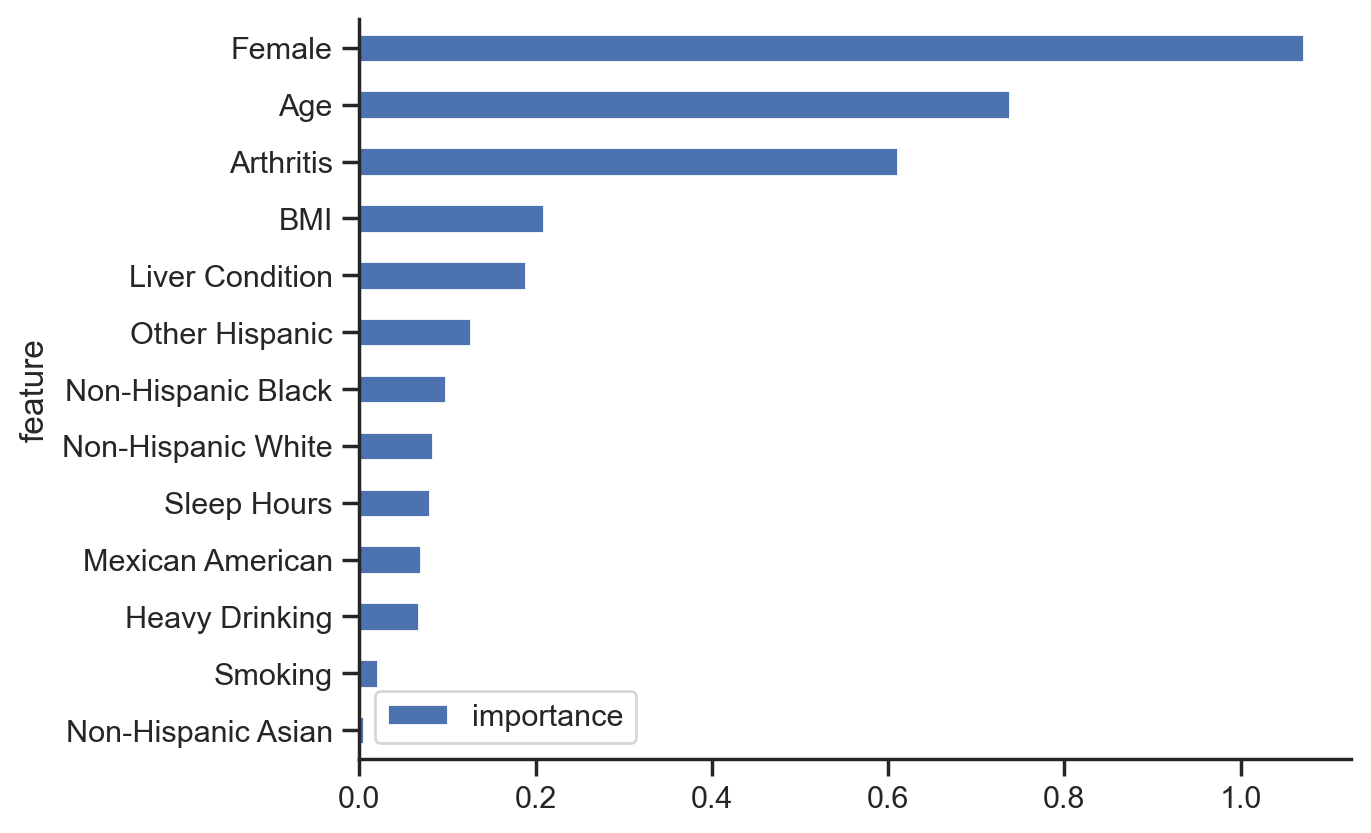

In [96]:
features = X_train_ss_ada
feature_importance=pd.DataFrame({'feature':list(features.columns),
                                 'importance':[abs(i) for i in lr_model_ada.coef_[0]]})
feature_importance = feature_importance.sort_values('importance',ascending=True)
                               
feature_importance.plot.barh(x='feature', y='importance') 
plt.show()

Gender (Female) has the highest feature importance.

Next, let's optimize the neural networks model.

## 14. Neural Networks Optimization

We already know that the neural network model has the highest F1 score, how can we further optimize the model?

There are 2 directions to modify its architecture: width and depth. Let's try both directions.

**Width**

More specially, we can keep the number of hidden layers to 1, make sure the # of nodes is between [2, 26] based on the rule we've mentioned earlier (the number of hidden neurons should be less than twice the size of the input layer). 

In [97]:
# set seed
np.random.seed(42)
tf.random.set_seed(42)

# get the list of models
one_layer_models = get_nn_models(
    num_layers=1, 
    min_nodes_per_layer=2, 
    max_nodes_per_layer=26, 
    node_step_size=4, 
    input_shape=(13,)
)

print(f'# of models = {len(one_layer_models)}')
for model in one_layer_models:
    print(model.name)

# of models = 7
dense2
dense6
dense10
dense14
dense18
dense22
dense26


In [98]:
# train and evaluate models
preds, optimization_results = evaludate_nn_models(
    models=one_layer_models,
    X_train=X_train_ss_ada,
    y_train=y_train_ada,
    X_test=X_test_ss,
    y_test=y_test
)

41/41 [==============================] - 0s 927us/step


The final performance metrics:

In [99]:
optimization_results.sort_values(by=['f1', 'recall'], ascending=False)

model_name  accuracy  precision  recall     f1    auc
1     dense6     0.790      0.274   0.682  0.391  0.820
0     dense2     0.799      0.276   0.636  0.385  0.821
4    dense18     0.785      0.268   0.674  0.383  0.819
3    dense14     0.793      0.271   0.643  0.382  0.809
2    dense10     0.783      0.263   0.659  0.376  0.814
6    dense26     0.782      0.262   0.659  0.374  0.815
5    dense22     0.782      0.252   0.612  0.357  0.818

The top 2 performance metrics are from 6 and 2 nodes, which means simple architecture works better for this dataset.

**Depth**

Now let's increase the number of hidden layers to 2, and make sure the max nodes is less than the input layer size 13 to limit its complexity.

In [100]:
two_layer_models = get_nn_models(
    num_layers=2, 
    min_nodes_per_layer=2, 
    max_nodes_per_layer=12,
    node_step_size=4,
    input_shape=(13,)
)

print(f'# of models = {len(two_layer_models)}')
for model in two_layer_models:
    print(model.name)

# of models = 9
dense2_dense2
dense2_dense6
dense2_dense10
dense6_dense2
dense6_dense6
dense6_dense10
dense10_dense2
dense10_dense6
dense10_dense10


In [101]:
# train and evaluate models
deep_preds, deep_optimization_results = evaludate_nn_models(
    models=two_layer_models,
    X_train=X_train_ss_smote,
    y_train=y_train_smote,
    X_test=X_test_ss,
    y_test=y_test
)

41/41 [==============================] - 0s 981us/step


In [102]:
deep_optimization_results.sort_values(by=['f1', 'recall'], ascending=False)

model_name  accuracy  precision  recall     f1    auc
3    dense6_dense2     0.788      0.277   0.705  0.397  0.825
1    dense2_dense6     0.781      0.272   0.721  0.395  0.818
8  dense10_dense10     0.795      0.277   0.667  0.392  0.818
2   dense2_dense10     0.773      0.266   0.729  0.389  0.814
7   dense10_dense6     0.786      0.271   0.682  0.388  0.806
6   dense10_dense2     0.787      0.270   0.674  0.386  0.818
4    dense6_dense6     0.796      0.270   0.620  0.376  0.818
5   dense6_dense10     0.789      0.265   0.636  0.374  0.817
0    dense2_dense2     0.741      0.240   0.744  0.363  0.812

Combing the 1 layer and 2 layers metrics:

In [103]:
pd.concat([optimization_results, deep_optimization_results]).sort_values(by=['f1', 'recall'], ascending=False)

model_name  accuracy  precision  recall     f1    auc
3    dense6_dense2     0.788      0.277   0.705  0.397  0.825
1    dense2_dense6     0.781      0.272   0.721  0.395  0.818
8  dense10_dense10     0.795      0.277   0.667  0.392  0.818
1           dense6     0.790      0.274   0.682  0.391  0.820
2   dense2_dense10     0.773      0.266   0.729  0.389  0.814
7   dense10_dense6     0.786      0.271   0.682  0.388  0.806
6   dense10_dense2     0.787      0.270   0.674  0.386  0.818
0           dense2     0.799      0.276   0.636  0.385  0.821
4          dense18     0.785      0.268   0.674  0.383  0.819
3          dense14     0.793      0.271   0.643  0.382  0.809
2          dense10     0.783      0.263   0.659  0.376  0.814
4    dense6_dense6     0.796      0.270   0.620  0.376  0.818
6          dense26     0.782      0.262   0.659  0.374  0.815
5   dense6_dense10     0.789      0.265   0.636  0.374  0.817
0    dense2_dense2     0.741      0.240   0.744  0.363  0.812
5          dense22     0.782      0.252   0.612  0.357  0.818

Neural networks with 1st hidden layer 6 nodes, 2nd hidden layer 2 nodes has the best performance. In reality, we may need to balance the additional cost of adding a layer with the benefit of performance gain, using the initial model (1 hidden layer with 6 nodes) should also be fine.

Overall, the precision on the osteoprosis label is relatively low, that's because it's a heavily imbalanced dataset. However, in view of the relatively high recall value, the model is still useful to help healthcare professionals diagnose osteoporosis.